In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime
import collections

# <span style= "font-family: Papyrus; font_size: 1em; font-style: underline; "> 🔻Step 1 | Chargement des données</span>

In [5]:
fichier_excel="Challenge dataset.xlsx" 
tab=pd.read_excel(fichier_excel,sheet_name=None)
print(tab.keys())

dat1,dat2,dat3=tab["2019"],tab["2020"],tab["Volontaire"]  #Affiche les differentes tables du jeux de donnees.

dict_keys(['2019', '2020', 'Volontaire'])


In [3]:
dat1.head()

,Date de remplissage de la fiche,Date de naissance,Niveau d'etude,Genre,Taille,Poids,Situation Matrimoniale (SM),Profession,Arrondissement de résidence,Quartier de Résidence,...,"Raison de non-eligibilité totale [Porteur(HIV,hbs,hcv)]",Raison de non-eligibilité totale [Opéré],Raison de non-eligibilité totale [Drepanocytaire],Raison de non-eligibilité totale [Diabétique],Raison de non-eligibilité totale [Hypertendus],Raison de non-eligibilité totale [Asthmatiques],Raison de non-eligibilité totale [Cardiaque],Raison de non-eligibilité totale [Tatoué],Raison de non-eligibilité totale [Scarifié],Si autres raison préciser
0,3/11/0019,1999-09-01 00:00:00,Pas Précisé,Homme,NaN,NaN,Célibataire,Chaudronnier,Douala 3,Logbaba,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/21/0019,1978-02-04 00:00:00,Universitaire,Homme,NaN,NaN,Marié (e),Secrétaire comptable,Douala (Non précisé ),NDOGPASSI 2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1977-12-25 00:00:00,1977-12-25 00:00:00,Secondaire,Femme,NaN,NaN,Marié (e),Commerçant (e),Douala (Non précisé ),Dakar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1986-02-06 00:00:00,1986-02-06 00:00:00,Secondaire,Homme,NaN,NaN,Célibataire,Homme d’affaire,Douala 5,NGANGUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1988-05-20 00:00:00,1988-05-20 00:00:00,Pas Précisé,Homme,NaN,NaN,Célibataire,Beat Maker,Douala (Non précisé ),Douala,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dat2.head()

,Horodateur,Sexe,Age,Type de donation,Groupe Sanguin ABO / Rhesus,Phenotype
0,2020-07-16 19:02:33.994,M,26,F,B+,"RH-2, RH+4, RH-3, RH+5, -kell1"
1,2020-07-16 19:05:51.521,M,24,F,O+,"RH-2, RH+4, RH-3, RH+5, -kell1"
2,2020-07-17 04:52:09.054,M,41,F,A+,"RH+2, RH+4, RH-3, RH+5, -kell1"
3,2020-07-17 04:56:03.200,M,20,F,O+,"RH-2, RH+4, RH-3, RH+5, -kell1"
4,2020-07-17 05:49:40.730,M,34,F,O+,"RH-2, RH+4, RH+3, RH+5, -kell1"


In [5]:
dat3.head()

,ID,Age,Horodateur,Niveau_d'etude,Genre_,Taille_,Poids,Situation_Matrimoniale_(SM),Profession_,Arrondissement_de_résidence_,...,"Raison_de_non-eligibilité_totale__[Porteur(HIV,hbs,hcv)]",Raison_de_non-eligibilité_totale__[Opéré],Raison_de_non-eligibilité_totale__[Drepanocytaire],Raison_de_non-eligibilité_totale__[Diabétique],Raison_de_non-eligibilité_totale__[Hypertendus],Raison_de_non-eligibilité_totale__[Asthmatiques],Raison_de_non-eligibilité_totale__[Cardiaque],Raison_de_non-eligibilité_totale__[Tatoué],Raison_de_non-eligibilité_totale__[Scarifié],Si_autres_raison_préciser_
0,DONOR_1842,24,46:44.9,Universitaire,Homme,NaN,NaN,Célibataire,Etudiant (e),Douala 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DONOR_1843,23,44:19.0,Universitaire,Homme,NaN,NaN,Célibataire,Sans Emplois,R A S,...,Non,Oui,Non,Non,Non,Non,Non,Non,Non,NaN
2,DONOR_1844,41,46:54.3,Aucun,Homme,NaN,NaN,Marié (e),Tailleur,Douala 1,...,Non,Non,Non,Non,Non,Non,Non,Non,Non,Aucune information
3,DONOR_1845,24,29:29.7,Universitaire,Homme,NaN,NaN,Célibataire,Etudiant,Douala 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DONOR_1846,30,47:47.4,Secondaire,Homme,NaN,NaN,Célibataire,Militaire,Douala (Non précisé ),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# <span style= "font-family: Papyrus; font_size: 1em; font-style: underline; "> 🔻Step 2 | Pretraitement des données</span>

# <span style= "font-family: Papyrus; font_size: 1em; font-style: underline; "> 🔻Step 2.1| Analyse de la forme du jeu de données </span>

In [6]:
# On va commencer par analyser les donnees de la table dat1
dat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 39 columns):
 #   Column                                                                                     Non-Null Count  Dtype         
---  ------                                                                                     --------------  -----         
 0   Date de remplissage de la fiche                                                            1913 non-null   object        
 1   Date de naissance                                                                          1915 non-null   object        
 2   Niveau d'etude                                                                             1915 non-null   object        
 3   Genre                                                                                      1915 non-null   object        
 4   Taille                                                                                     62 non-null     float64       
 5  

In [7]:
# taille de la table dat1
dat1.shape

(1915, 39)

In [8]:
# Analyse des donnees manquantes
dat1.isnull().sum()

Date de remplissage de la fiche                                                                 2
Date de naissance                                                                               0
Niveau d'etude                                                                                  0
Genre                                                                                           0
Taille                                                                                       1853
Poids                                                                                        1809
Situation Matrimoniale (SM)                                                                     0
Profession                                                                                      0
Arrondissement de résidence                                                                     0
Quartier de Résidence                                                                           0
Nationalité         

In [3]:
# Analyse des donnees dupliquees
dat1.duplicated().sum()

36

In [12]:
# Affichage des donnees dupliquees
dat1[dat1.duplicated()]

,Date de remplissage de la fiche,Date de naissance,Niveau d'etude,Genre,Taille,Poids,Situation Matrimoniale (SM),Profession,Arrondissement de résidence,Quartier de Résidence,...,"Raison de non-eligibilité totale [Porteur(HIV,hbs,hcv)]",Raison de non-eligibilité totale [Opéré],Raison de non-eligibilité totale [Drepanocytaire],Raison de non-eligibilité totale [Diabétique],Raison de non-eligibilité totale [Hypertendus],Raison de non-eligibilité totale [Asthmatiques],Raison de non-eligibilité totale [Cardiaque],Raison de non-eligibilité totale [Tatoué],Raison de non-eligibilité totale [Scarifié],Si autres raison préciser
5,1988-05-20 00:00:00,1988-05-20 00:00:00,Pas Précisé,Homme,NaN,NaN,Célibataire,Beat Maker,Douala (Non précisé ),Douala,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,2019-04-04 00:00:00,1986-04-27 00:00:00,Pas Précisé,Homme,NaN,NaN,Célibataire,Gendarme,Douala 3,Parisot nyalla,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596,2019-04-25 00:00:00,1984-04-25 00:00:00,Secondaire,Homme,NaN,85.0,Marié (e),Mécanicien,Douala 3,Ndogpassi 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
629,2019-05-03 00:00:00,1987-07-28 00:00:00,Secondaire,Homme,NaN,NaN,Marié (e),Peintre,Douala 2,newbell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
642,2019-05-06 00:00:00,1986-02-18 00:00:00,Universitaire,Homme,NaN,NaN,Marié (e),taximan,Douala 3,nboko,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
646,2019-05-06 00:00:00,2002-11-01 00:00:00,Secondaire,Homme,NaN,NaN,Célibataire,Sans Emplois,Douala 3,TERGAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,2019-07-01 00:00:00,1985-05-12 00:00:00,Universitaire,Homme,NaN,NaN,Marié (e),Enseignant (e),Douala (Non précisé ),NDONGBONG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
688,2019-07-01 00:00:00,1985-05-12 00:00:00,Universitaire,Homme,NaN,NaN,Marié (e),Enseignant (e),Douala (Non précisé ),NDONGBONG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
859,2019-08-06 00:00:00,1977-05-08 00:00:00,Secondaire,Homme,NaN,NaN,Marié (e),Enseignant (e),Douala (Non précisé ),Douala,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
862,2019-08-06 00:00:00,1982-11-04 00:00:00,Universitaire,Homme,NaN,NaN,Marié (e),Personnel de sante,Douala 3,Total Nkolobong,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Affichages des lignes qui ont des valeurs manquantes sur toutes les colonnes
dat1[dat1.isnull().all(axis=1)]

,Date de remplissage de la fiche,Date de naissance,Niveau d'etude,Genre,Taille,Poids,Situation Matrimoniale (SM),Profession,Arrondissement de résidence,Quartier de Résidence,...,"Raison de non-eligibilité totale [Porteur(HIV,hbs,hcv)]",Raison de non-eligibilité totale [Opéré],Raison de non-eligibilité totale [Drepanocytaire],Raison de non-eligibilité totale [Diabétique],Raison de non-eligibilité totale [Hypertendus],Raison de non-eligibilité totale [Asthmatiques],Raison de non-eligibilité totale [Cardiaque],Raison de non-eligibilité totale [Tatoué],Raison de non-eligibilité totale [Scarifié],Si autres raison préciser


In [15]:
# Affichages du pourcentage des valeurs manquantes par colonne et par ordre decroissant en ingorant les colonnes qui n'ont pas de valeurs manquantes
dat1.isnull().mean().sort_values(ascending=False).loc[lambda x : x>0] * 100


Si autres raison préciser                                                                    99.321149
Autre raisons,  preciser                                                                     98.955614
Date de dernières règles (DDR)                                                               97.911227
Raison de l’indisponibilité de la femme [Interruption de grossesse  ces 06 derniers mois]    97.023499
Raison de l’indisponibilité de la femme [est enceinte ]                                      97.023499
Raison de l’indisponibilité de la femme [A accoucher ces 6 derniers mois  ]                  96.971279
Raison de l’indisponibilité de la femme [Allaitement ]                                       96.919060
Raison de l’indisponibilité de la femme [La DDR est mauvais si <14 jour avant le don]        96.919060
Taille                                                                                       96.762402
Raison de non-eligibilité totale  [Hypertendus]                          

####  Analyse de la forme de chaque colonne 


In [16]:
#colonnes Date de remplissage de la fiche
dat1["Date de remplissage de la fiche"].sample(10)

1587    2019-06-19 00:00:00
395     2019-03-14 00:00:00
233     2019-02-06 00:00:00
1507    2019-12-18 00:00:00
183     2019-01-25 00:00:00
1355    2019-11-11 00:00:00
729     2019-07-11 00:00:00
892     2019-08-14 00:00:00
353     2019-03-06 00:00:00
1580    2019-06-20 00:00:00
Name: Date de remplissage de la fiche, dtype: object

In [19]:
# valeurs uniques de la colonne Date de remplissage de la fiche par odre croissant

dat1["Date de remplissage de la fiche"].unique()

array(['3/11/0019', '3/21/0019', datetime.datetime(1977, 12, 25, 0, 0),
       datetime.datetime(1986, 2, 6, 0, 0),
       datetime.datetime(1988, 5, 20, 0, 0),
       datetime.datetime(1990, 2, 7, 0, 0),
       datetime.datetime(1992, 12, 6, 0, 0),
       datetime.datetime(1995, 1, 9, 0, 0),
       datetime.datetime(2013, 1, 30, 0, 0),
       datetime.datetime(2015, 5, 7, 0, 0),
       datetime.datetime(2018, 1, 17, 0, 0),
       datetime.datetime(2018, 2, 2, 0, 0),
       datetime.datetime(2018, 2, 28, 0, 0),
       datetime.datetime(2018, 4, 1, 0, 0),
       datetime.datetime(2019, 1, 2, 0, 0),
       datetime.datetime(2019, 1, 3, 0, 0),
       datetime.datetime(2019, 1, 4, 0, 0),
       datetime.datetime(2019, 1, 7, 0, 0),
       datetime.datetime(2019, 1, 8, 0, 0),
       datetime.datetime(2019, 1, 9, 0, 0),
       datetime.datetime(2019, 1, 11, 0, 0),
       datetime.datetime(2019, 1, 14, 0, 0),
       datetime.datetime(2019, 1, 15, 0, 0),
       datetime.datetime(2019, 1, 16, 0,

*Remarques*


In [20]:
# colonne date de naissance
dat1["Date de naissance"].sample(10)

1842    1969-02-25 00:00:00
1563    2000-01-27 00:00:00
311     2000-01-07 00:00:00
1780             12/28/0080
564     1995-08-11 00:00:00
757     1987-10-11 00:00:00
1234    1964-09-01 00:00:00
1291    1981-08-16 00:00:00
113     2000-09-07 00:00:00
1698    1990-08-07 00:00:00
Name: Date de naissance, dtype: object

In [27]:
# valeurs uniques de la colonne date de naissance
for element in dat1["Date de naissance"].unique():
    print(element) 

1999-09-01 00:00:00
1978-02-04 00:00:00
1977-12-25 00:00:00
1986-02-06 00:00:00
1988-05-20 00:00:00
1990-02-01 00:00:00
1992-12-06 00:00:00
1995-05-11 00:00:00
1980-11-22 00:00:00
1991-11-24 00:00:00
1994-02-20 00:00:00
1988-11-08 00:00:00
1975-03-02 00:00:00
1985-03-08 00:00:00
1993-05-04 00:00:00
1999-04-25 00:00:00
1990-03-19 00:00:00
1978-10-07 00:00:00
1985-02-11 00:00:00
1985-12-14 00:00:00
1998-11-20 00:00:00
1998-06-07 00:00:00
1979-09-28 00:00:00
1981-10-06 00:00:00
1989-10-25 00:00:00
1982-03-11 00:00:00
1980-07-15 00:00:00
1984-04-01 00:00:00
1997-09-26 00:00:00
1990-12-23 00:00:00
1986-03-17 00:00:00
1992-05-09 00:00:00
1991-06-14 00:00:00
1993-04-06 00:00:00
1993-01-13 00:00:00
1993-06-26 00:00:00
1992-02-01 00:00:00
1994-07-07 00:00:00
1987-10-09 00:00:00
1999-01-01 00:00:00
1992-04-30 00:00:00
1990-11-27 00:00:00
1980-08-26 00:00:00
1991-04-04 00:00:00
1975-05-19 00:00:00
1985-03-17 00:00:00
1972-01-05 00:00:00
1992-07-16 00:00:00
1978-02-27 00:00:00
1995-10-03 00:00:00


*Remarques*

In [11]:
# affichage de valeurs de la colonne Niveau d'etude
dat1["Niveau d'etude"].sample(10)

268       Pas Précisé
364        Secondaire
1783      Pas Précisé
81        Pas Précisé
270       Pas Précisé
1162    Universitaire
261             Aucun
1579      Pas Précisé
1466      Pas Précisé
769     Universitaire
Name: Niveau d'etude, dtype: object

In [12]:
# valeurs uniques de la colonne Niveau d'etude
dat1["Niveau d'etude"].unique()

array(['Pas Précisé', 'Universitaire', 'Secondaire', 'Primaire', 'Aucun'],
      dtype=object)

In [14]:
# valeeurs manquantes de la colonne Niveau d'etude
dat1["Niveau d'etude"].isnull().sum()

0

In [20]:
# valeurs  de la colonne Genre
dat1["Genre"].sample(10)

1591    Homme
1727    Homme
307     Homme
448     Femme
656     Homme
1271    Homme
881     Homme
1451    Homme
769     Homme
981     Homme
Name: Genre, dtype: object

In [21]:
# valeurs uniques de la colonne Genre
dat1["Genre"].unique()

array(['Homme', 'Femme'], dtype=object)

In [22]:
# valeurs manquantes de la colonne Genre
dat1["Genre"].isnull().sum()

0

In [25]:
# affichage des valeurs de la colonne Taille
dat1["Taille"].sample(10) 

1457   NaN
503    NaN
1355   NaN
1493   NaN
1479   NaN
265    NaN
561    NaN
1310   NaN
450    NaN
1653   NaN
Name: Taille, dtype: float64

In [26]:
# description de la colonne Taille
dat1["Taille"].describe()

count     62.000000
mean     172.596774
std        7.023286
min      158.000000
25%      168.000000
50%      172.000000
75%      177.000000
max      192.000000
Name: Taille, dtype: float64

In [27]:
# pourcentage des valeurs manquantes de la colonne Taille
dat1["Taille"].isnull().mean() * 100

96.76240208877284

*Remarque*

In [28]:
# colonne Poids
dat1["Poids"].sample(10)

192    NaN
835    NaN
624    NaN
892    NaN
638    NaN
464    NaN
142    NaN
1792   NaN
129    NaN
949    NaN
Name: Poids, dtype: float64

In [30]:
# description de la colonne Poids
dat1["Poids"].describe()

count    106.000000
mean      77.481132
std       12.467276
min       55.000000
25%       69.250000
50%       75.000000
75%       85.000000
max      120.000000
Name: Poids, dtype: float64

In [31]:
# pourcentage des valeurs manquantes de la colonne Poids
dat1["Poids"].isnull().mean() * 100

94.46475195822455

*Remarques*

In [33]:
#  affichage des valeurs de la colonne Situation Matrimoniale (SM)
dat1["Situation Matrimoniale (SM)"].sample(10)

1348      Marié (e)
487       Marié (e)
1488    Célibataire
1176    Célibataire
994     Célibataire
334     Célibataire
1857    Célibataire
147       Marié (e)
531     Célibataire
408       Marié (e)
Name: Situation Matrimoniale (SM), dtype: object

In [34]:
# valeurs uniques de la colonne Situation
dat1["Situation Matrimoniale (SM)"].unique()    

array(['Célibataire', 'Marié (e)', 'Divorcé(e)', 'veuf (veuve)'],
      dtype=object)

In [37]:
dat1.columns[7]

'Profession'

In [39]:
# pourcentage des valeurs manquantes de la colonne Situation
dat1["Situation Matrimoniale (SM)"].isnull().sum()* 100

0

In [40]:
# affichage des valeurs de la colonne Profession
dat1["Profession"].sample(10) 

1858               Sans Emplois
1067                 Technicien
288                Etudiant (e)
1671               Sans Emplois
1066    Machiniste- Électricien
153                    MENUSIER
1285               Etudiant (e)
1844               Sans Emplois
1029             Enseignant (e)
375                    Chimiste
Name: Profession, dtype: object

In [41]:
# Affichage des valeurs uniques de la colonne Profession
dat1["Profession"].unique()

array(['Chaudronnier ', 'Secrétaire comptable', 'Commerçant (e)',
       'Homme d’affaire', 'Beat Maker', "AGENT D'ENTRETIEN",
       'Technicien d’etancheite ', 'Mécanicien', 'Soudeur', 'Estheticien',
       'Etudiant (e)', 'Negoce bois', 'Juriste', 'Agent de securite',
       'Vigil', 'Plombier', 'Maçon', 'Eleve', 'Agent technique',
       'Trieur ', 'Chauffeur', 'Machiniste', 'Maitresse',
       'Chargée de communication', 'Technicien', 'Sans Emplois',
       'TECHNICIEN EN AGRICULTURE', "Homme d'affaire", 'FOOTBALLEUR',
       'Enseignant (e)', 'Comptable', 'Realisateur', 'Electricien',
       "Infor'aticien", 'Technicien supérieur d’agriculture', 'Ménagère',
       'Agent commercial ', 'Intendant infirmier supérieur ',
       'Agent immobilier ', 'Vendeur', 'Cableur', 'Électricien ',
       'Élève ', 'Vendeur ', 'Technicien de laboratoire', 'Docker ',
       'Développeur en informatique ', 'Commercial', 'Footballeur',
       'Footballeur ', 'Dolker ', 'Ingénieur', 'Stagiaitaire C 

*Remarques*

In [44]:
# affichage de valeur Arrondissement de résidence
dat1["Arrondissement de résidence"].sample(10)

935                   Yaoundé
574                  Douala 3
332     Douala (Non précisé )
588               Non précisé
733                  Douala 1
1729                 Douala 1
1815    Douala (Non précisé )
504                  Douala 3
505                  Douala 4
74      Douala (Non précisé )
Name: Arrondissement de résidence, dtype: object

In [45]:
# valeurs uniques de la colonne Arrondissement de residence
dat1["Arrondissement de résidence"].unique()

array(['Douala 3', 'Douala (Non précisé )', 'Douala 5', 'Douala 1',
       'Yaounde', 'Douala 2', 'Douala 4', 'Bafoussam', 'Dschang',
       'Non précisé', 'Buea', 'Kribi', 'Pas précisé', 'Njombe', 'TIKO',
       'Edea', 'Manjo', 'West', 'Douala', 'Yaoundé', 'OYACK', 'Nkouabang',
       'BUEA', 'Deido', 'Pas mentionné', 'Douala 6', 'batie',
       'Bomono Ba Mbegue', 'Meiganga', 'Pas precise', 'non precisé',
       'SUD OUEST TOMBEL', 'Pas précisé ', 'Ngodi Bakoko ', 'Ras',
       'R A S ', 'LIMBE ', 'R A S', 'RAS', 'DCANKONGMONDO', 'BOKO',
       'RAS '], dtype=object)

*Remarques*

In [49]:
# affichage des valeurs de la colonne Quartier de Résidence
dat1["Quartier de Résidence"].sample(10)

250     NDOPASSI III
1904           YASSA
504         Malangue
954           Japoma
831           Douala
1029          DOUALA
1174         Logbaba
595      Ndogpassi 3
19             Dakar
1020          JAPOMA
Name: Quartier de Résidence, dtype: object

In [50]:
# valeurs uniques de la colonne Quartier de Residence
dat1["Quartier de Résidence"].unique()

array(['Logbaba ', 'NDOGPASSI 2', 'Dakar', 'NGANGUE', 'Douala', 'BEPENDA',
       'Bepanda', 'Pk14', 'Ari ', 'Douala douala', 'Logbessou ',
       'Bependa', 'Makepe', 'Pk12', 'NYALLA', 'Nyalla', 'Nkolbong',
       'Yassa', 'Ngodi bakoko', 'Ndokoti', 'Deido', 'Bastos', 'New bell',
       'Sic cacao', 'Boko', 'Ndogpassi 3', 'Ndogpassi ', 'DOUALA', 'PK13',
       'PK9', 'BEPANDA', 'BESSENGUE', 'Ari', 'Newbell', 'Yansoki ',
       'Ndobo ', 'Mbanga', 'Pk8', 'Village', 'Japoma',
       'Terminus saint Michel ', 'Bonanjo', 'Bonaberi', 'Deido ',
       'Bafoussam', 'Ccc ', 'Soboum-Dakar ', 'Hôpital général de douala ',
       'Saint Thomas logbaba ', 'Bangapongo ', 'New town aéroport ',
       'NDOGPASSI 3', 'She’ll-village', 'She’ll village ', 'Bependa ',
       'Bocom safari ', 'Kotto', 'Logpom', 'Bonamoussadi',
       'Bonamoussadi ', 'Dschang', 'Nyalla pariso', 'Nyalla chateau',
       'Nkolmesseng', 'Carrefour ari', 'Bependa Aeroport', 'Cite cic',
       'Ndg-bong', 'Ndogbong ', 'Douala

*Remarques*

In [51]:
# Affichage des valeurs de la colonne Nationalité
dat1['Nationalité'].sample(10)

1199    Camerounaise
1651    Camerounaise
358     Camerounaise
346     Camerounaise
1018    Camerounaise
1420    Camerounaise
1683    Camerounaise
881     Camerounaise
1174    Camerounaise
768     Camerounaise
Name: Nationalité, dtype: object

In [52]:
# valeurs uniques de la colonne Nationalité
dat1['Nationalité'].unique()

array(['Camerounaise', 'Malienne', 'Centrafricaine', 'Non precisé',
       'Rien', 'AMERICAINE', 'Malien', 'Tchadienne', 'R.A.S', 'R A S',
       'RAS', 'R A S ', 'Ras', ' R A S', 'CENTRAFRICAINE'], dtype=object)

*Remarque*

In [53]:
# affichage des valeurs de la colonne A-t-il (elle) déjà donné le sang']
dat1["A-t-il (elle) déjà donné le sang"].sample(10)

675     Oui
1197    Non
924     Oui
1452    Non
1199    Oui
477     Non
1207    Non
507     Oui
341     Non
1890    Non
Name: A-t-il (elle) déjà donné le sang, dtype: object

In [54]:
# affichage des valeurs uniques de la colonne A-t-il (elle) déjà donné le sang
dat1["A-t-il (elle) déjà donné le sang"].unique()

array(['Oui', 'Non'], dtype=object)

In [56]:
# affichage des valeurs de la colonne Si oui preciser la date du dernier don.
dat1["Si oui preciser la date du dernier don."].sample(10)

361                     NaN
41      2018-05-25 00:00:00
32                      NaN
1399    2019-08-19 00:00:00
1202                    NaN
802     2018-03-01 00:00:00
1479                    NaN
1135                    NaN
1281    2017-01-01 00:00:00
451     2014-01-01 00:00:00
Name: Si oui preciser la date du dernier don., dtype: object

In [58]:
# valeurs uniques de la colonne Si oui preciser la date du dernier don.
dat1["Si oui preciser la date du dernier don."].unique()


array([datetime.datetime(2017, 1, 1, 0, 0),
       datetime.datetime(2019, 2, 26, 0, 0),
       datetime.datetime(2009, 1, 1, 0, 0), nan,
       datetime.datetime(2018, 8, 7, 0, 0),
       datetime.datetime(2018, 2, 1, 0, 0),
       datetime.datetime(2018, 3, 17, 0, 0),
       datetime.datetime(2018, 6, 1, 0, 0),
       datetime.datetime(2020, 2, 29, 0, 0),
       datetime.datetime(2011, 1, 1, 0, 0),
       datetime.datetime(2018, 4, 1, 0, 0),
       datetime.datetime(2018, 1, 1, 0, 0),
       datetime.datetime(2018, 2, 6, 0, 0),
       datetime.datetime(2018, 5, 25, 0, 0),
       datetime.datetime(2018, 9, 1, 0, 0),
       datetime.datetime(2017, 3, 17, 0, 0),
       datetime.datetime(2014, 1, 1, 0, 0),
       datetime.datetime(2002, 1, 1, 0, 0),
       datetime.datetime(1999, 1, 1, 0, 0),
       datetime.datetime(2013, 1, 1, 0, 0),
       datetime.datetime(2018, 10, 15, 0, 0),
       datetime.datetime(2018, 9, 15, 0, 0),
       datetime.datetime(2005, 1, 1, 0, 0),
       datetime.dat

In [ ]:
# affichage des valeurs de la colonne Taux d’hémoglobine
dat1['Taux d’hémoglobine'].sample(10)

1205         NaN
177          NaN
361          NaN
1513    14.6g/dl
1070        13.8
1000        13.5
1428        15.1
309          NaN
50            15
1208        13.6
Name: Taux d’hémoglobine, dtype: object

In [61]:
# description de la colonne Taux d’hémoglobine
dat1['Taux d’hémoglobine'].describe()

count     1070
unique     148
top         13
freq        76
Name: Taux d’hémoglobine, dtype: int64

In [ ]:
# nombre  des valeurs manquantes de la colonne Taux d’hémoglobine
dat1['Taux d’hémoglobine'].isnull().sum()

845

*Remarques*

In [66]:
# affichage des valeurs de la colonne ÉLIGIBILITÉ AU DON.
dat1['ÉLIGIBILITÉ AU DON.'].sample(10)

1224    Temporairement Non-eligible
1461                       Eligible
1078                       Eligible
1773    Temporairement Non-eligible
785                        Eligible
1161                       Eligible
936                        Eligible
1120                       Eligible
577                        Eligible
765                        Eligible
Name: ÉLIGIBILITÉ AU DON., dtype: object

In [67]:
# valeurs uniques de la colonne ÉLIGIBILITÉ AU DON.
dat1['ÉLIGIBILITÉ AU DON.'].unique()

array(['Eligible', 'Temporairement Non-eligible',
       'Définitivement non-eligible'], dtype=object)

In [68]:
# nombre des valeurs manquantes de la colonne ÉLIGIBILITÉ AU DON.
dat1['ÉLIGIBILITÉ AU DON.'].isnull().sum()

0

In [65]:
# affichage de la colonne 
dat1.columns[12:20]

Index(['A-t-il (elle) déjà donné le sang',
       'Si oui preciser la date du dernier don.', 'Taux d’hémoglobine',
       'ÉLIGIBILITÉ AU DON.',
       'Raison indisponibilité  [Est sous anti-biothérapie  ]',
       'Raison indisponibilité  [Taux d’hémoglobine bas ]',
       'Raison indisponibilité  [date de dernier Don < 3 mois ]',
       'Raison indisponibilité  [IST récente (Exclu VIH, Hbs, Hcv)]'],
      dtype='object')

In [ ]:
def analyze_columns(df, columns):
    analysis = {
        'Column': [],
        'Missing Values': [],
        'Unique Values Count': [],
        'Unique Values': []
    }
    
    for column in columns:
        analysis['Column'].append(column)
        analysis['Missing Values'].append(df[column].isnull().sum())
        analysis['Unique Values Count'].append(df[column].nunique())
        analysis['Unique Values'].append(df[column].unique().tolist())
    
    return pd.DataFrame(analysis)



,Column,Missing Values,Unique Values Count,Unique Values
0,Date de naissance,0,1618,"[1999-09-01 00:00:00, 1978-02-04 00:00:00, 197..."
1,Niveau d'etude,0,5,"[Pas Précisé, Universitaire, Secondaire, Prima..."
2,Genre,0,2,"[Homme, Femme]"


In [72]:
# application de la fonction analyze_columns sur les colonnes allant 22 à 39 de la table dat1
analyze_columns(dat1, dat1.columns[16:39])

,Column,Missing Values,Unique Values Count,Unique Values
0,Raison indisponibilité [Est sous anti-biothér...,1748,2,"[nan, Non, Oui]"
1,Raison indisponibilité [Taux d’hémoglobine bas ],1716,2,"[nan, Oui, Non]"
2,Raison indisponibilité [date de dernier Don <...,1755,2,"[nan, Non, Oui]"
3,Raison indisponibilité [IST récente (Exclu VI...,1757,2,"[nan, Non, Oui]"
4,Date de dernières règles (DDR),1875,36,"[NaT, 2019-10-06 00:00:00, 2019-09-26 00:00:00..."
5,Raison de l’indisponibilité de la femme [La DD...,1856,2,"[nan, Oui, Non]"
6,Raison de l’indisponibilité de la femme [Allai...,1856,1,"[nan, Non]"
7,Raison de l’indisponibilité de la femme [A acc...,1857,1,"[nan, Non]"
8,Raison de l’indisponibilité de la femme [Inter...,1858,1,"[nan, Non]"
9,Raison de l’indisponibilité de la femme [est e...,1858,1,"[nan, Non]"


*Remarques*

## Conlusion de cette partie 

## <span style= "font-family: Papyrus; font_size: 1em; font-style: underline; "> 🔻Step 2.2 | Pretraitement des données de la table 2019</span>

In [6]:
# suppresion des doublons dans le jeu de données dat1
dat1.drop_duplicates(inplace=True)

### A.Modification de la colonne Date de remplissage 

In [7]:
#remplace les 0019$ par 2019
dat1['Date de remplissage de la fiche']=dat1['Date de remplissage de la fiche'].astype(str).str.replace(r"0019$", "2019", regex=True)

# Convertir uniquement les dates valides
dat1['Date de remplissage de la fiche'] = dat1['Date de remplissage de la fiche'].apply(lambda x: x.replace('/', '-'))

# Afficher le DataFrame après la modification
dat1['Date de remplissage de la fiche'].unique()

# Fonction pour convertir MM-DD-YYYY en YYYY-MM-DD
def convert_date_format(date_str):
    try:
        # Convertir en objet datetime
        date_obj = pd.to_datetime(date_str, format='%m-%d-%Y')
        # Formater en YYYY-MM-DD
        return date_obj.strftime('%Y-%m-%d')
    except ValueError:
        # Retourner la valeur originale si la conversion échoue
        return date_str

# Appliquer la fonction à la colonne
dat1['Date de remplissage de la fiche'] = dat1['Date de remplissage de la fiche'].apply(convert_date_format)
dat1['Date de remplissage de la fiche']

0                2019-03-11
1                2019-03-21
2       1977-12-25 00:00:00
3       1986-02-06 00:00:00
4       1988-05-20 00:00:00
               ...         
1910    2019-05-06 00:00:00
1911    2019-12-09 00:00:00
1912    2019-12-06 00:00:00
1913    2019-05-15 00:00:00
1914    2019-05-08 00:00:00
Name: Date de remplissage de la fiche, Length: 1879, dtype: object

### B.Modification de la colonne Date de naissance etcreation de la colonne Age 

In [8]:
"""creation d'une fonction qui prends en parametre une colonne qui contient les informations sur la date sous cette forme 1999-09-01 00:00:00 et qui retourne juste l'annee par exemple
1999-09-01 00:00:00 renvoie 1999 c'est à dire l'annee et les 4 premiers caracteres de la chaine de caractere"""
def extract_year(date_str):
    try:
        # Convertir en objet datetime
        date_obj = pd.to_datetime(date_str, format='%Y-%m-%d')
        # Récupérer l'année
        return date_obj.year
    except ValueError:
        # Retourner la valeur originale si la conversion échoue
        return date_str     


In [9]:
# Appliquer la fonction à la colonne
dat1['Date de naissance'] = dat1['Date de naissance'].apply(extract_year)

# Afficher le DataFrame après la modification
dat1['Date de naissance'].unique()

array([1999, 1978, 1977, 1986, 1988, 1990, 1992, 1995, 1980, 1991, 1994,
       1975, 1985, 1993, 1998, 1979, 1981, 1989, 1982, 1984, 1997, 1987,
       1972, 1974, 1996, 1966, 2000, 1983, 2019, 1971, 1968, 2020, 1976,
       2089, 2092, 1973, 1962, 1969, 1963, 2001, 1965, 1970, 1964, 2002,
       2008, 2009, 1967, 1961, 2007, '11/18/1882', 1957, 2003, 1960, 1959,
       '4/16/0093', '1/1/0000', '12/28/0080', '5/19/0096', '1/1/0001',
       1958], dtype=object)

In [10]:
def clean_birth_date(date):
    try:
        # Si c'est un entier, on le conserve tel quel
        if isinstance(date, int):
            return date
        
        # Si ce n'est pas un entier, on retourne NaN
        return np.nan
    except:
        return np.nan

# Appliquer la fonction à la colonne
dat1['Date de naissance'] = dat1['Date de naissance'].apply(clean_birth_date)

In [11]:
#creation de la colonne age
dat1['Age'] = 2019 - dat1['Date de naissance']
#dat1['Age']=dat1['Age'].fillna(0).astype(int)
dat1['Age']

0       20.0
1       41.0
2       42.0
3       33.0
4       31.0
        ... 
1910    37.0
1911    28.0
1912    22.0
1913    28.0
1914    26.0
Name: Age, Length: 1879, dtype: float64

In [12]:
# valeurs manquantes de la colonne Age
dat1['Age'].isnull().sum()

20

In [13]:
# distribution de la colonne Age
dat1['Age'].describe()

count    1859.000000
mean       30.849381
std         9.519450
min       -73.000000
25%        25.000000
50%        30.000000
75%        36.000000
max        62.000000
Name: Age, dtype: float64

Text(0.5, 0, 'Âge')

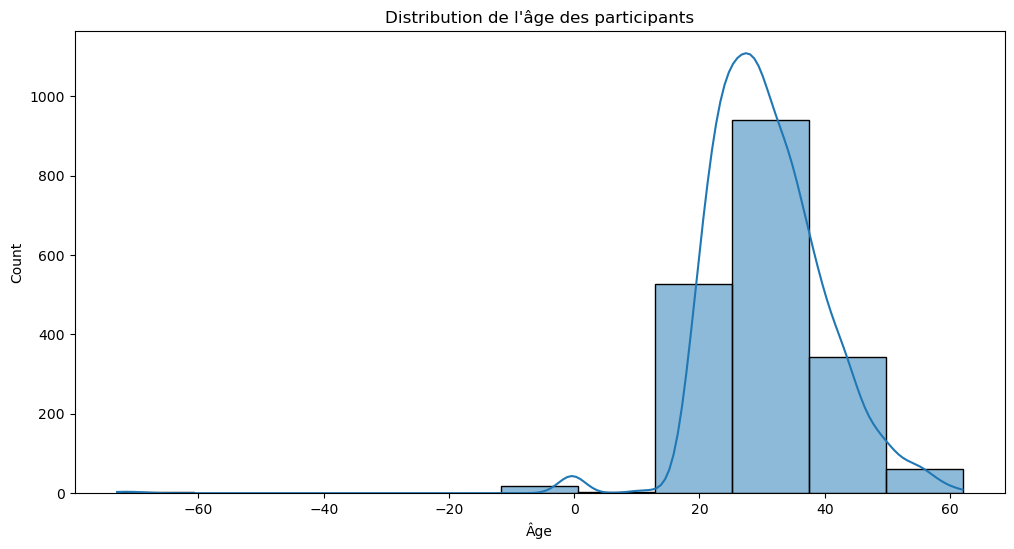

In [105]:
# histogramme de la colonne Age
plt.figure(figsize=(12, 6))
sns.histplot(dat1['Age'], bins=int(1 + np.log2(1915)), kde=True)
plt.title('Distribution de l\'âge des participants')
plt.xlabel('Âge')


Text(0.5, 1.0, "Boxplot de l'âge des participants")

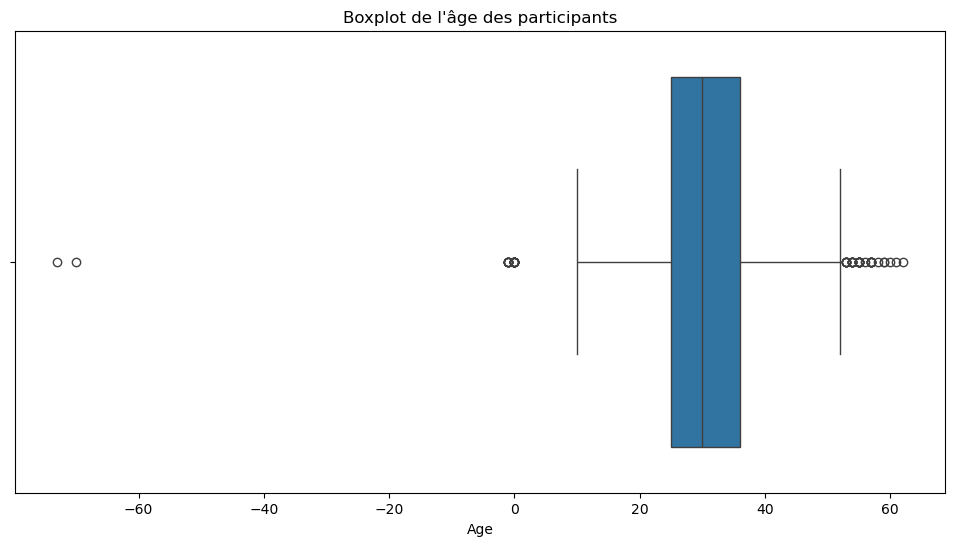

In [109]:
# boxplot de la colonne Age
plt.figure(figsize=(12, 6))
sns.boxplot(x=dat1['Age'])
plt.title('Boxplot de l\'âge des participants')

### C. Modification de la colonne Situation matrimoniale du data de 2019

In [14]:
# Mettre toutes les valeurs en minuscules
dat1["Situation Matrimoniale (SM)"] = dat1["Situation Matrimoniale (SM)"].astype(str).str.lower()

# Enlever (e) à la fin des métiers grace aux expressions regulières
dat1["Situation Matrimoniale (SM)"]=dat1["Situation Matrimoniale (SM)"].str.replace(r"\(e\)$", "", regex=True)
dat1["Situation Matrimoniale (SM)"]

0       célibataire
1            marié 
2            marié 
3       célibataire
4       célibataire
           ...     
1910    célibataire
1911    célibataire
1912    célibataire
1913    célibataire
1914    célibataire
Name: Situation Matrimoniale (SM), Length: 1879, dtype: object

### D.Visualisation de la colonne niveau d'etude et genre

In [15]:
dat1["Niveau d'etude"].isna().sum(),dat1["Genre"].isna().sum()

(0, 0)

### G.Modification de la colonne Profession et situation matrimoniale

In [16]:
# Mettre toutes les valeurs en minuscules
dat1["Profession"] = dat1["Profession"].astype(str).str.lower()

# Enlever (e) à la fin des métiers grace aux expressions regulières
dat1["Profession"]=dat1["Profession"].str.replace(r"\(e\)$", "", regex=True)
dat1["Profession"]

0                     chaudronnier 
1              secrétaire comptable
2                       commerçant 
3                   homme d’affaire
4                        beat maker
                   ...             
1910                          r a s
1911                       hotelier
1912                    commerçant 
1913         technicien genie civil
1914    electricien instrumentiste 
Name: Profession, Length: 1879, dtype: object

In [17]:
def classer_metier(metier: str) -> str:
    categories = {
        "Métiers de la santé": ["Médecin", "Infirmier", "Chirurgienne dentiste", "Auxiliaire de pharmacie", "Administrateur des hôpitaux", "Personnel de santé"],
        "Métiers de la construction et du bâtiment": ["Maçon", "Plombier", "Électricien", "Carreleur", "Technicien en bâtiment", "Constructeur en bâtiment"],
        "Métiers de la logistique et du transport": ["Chauffeur", "Taximan", "Conducteur d'engins", "Transporteur", "Opérateur portique"],
        "Métiers de l'industrie et de la mécanique": ["Mécanicien", "Électromécanicien", "Technicien en métallurgie", "Ingénieur en mécanique"],
        "Métiers de l'informatique et du numérique": ["Développeur en informatique", "Ingénieur en informatique", "Informaticien de réseau", "Analyste-programmeur"],
        "Métiers du commerce et de la gestion": ["Comptable", "Chef comptable", "Auditeur interne", "Gestionnaire de ressources humaines"],
        "Métiers de la communication et du marketing": ["Chargé de communication", "Chargé de clientèle", "Market-developer", "Journaliste"],
        "Métiers de la sécurité et de la surveillance": ["Agent de sécurité", "Chef de sécurité", "Vigile", "Sécurité officer"],
        "Métiers de l'éducation et de la formation": ["Enseignant", "Moniteur", "Éducateur des enfants", "Assistant administratif"],
        "Métiers de l’art et de la culture": ["Photographe", "Musicien", "Beat maker", "Sculpteur"],
        "Métiers de la restauration et de l'hôtellerie": ["Cuisinier", "Pâtissier", "Hôtelier", "Brasseur"],
        "Métiers agricoles et environnementaux": ["Cultivateur", "Agriculteur", "Technicien en agriculture", "Forestier"]
    }
    
    for categorie, metiers in categories.items():
        if metier in metiers:
            return categorie
    
    return "Métier non classé"

# Exemple d'utilisation
print(classer_metier("Cultivateur"))  # Retourne: Métiers de la santé


Métiers agricoles et environnementaux


In [18]:
# application de la fonction classer_metier sur la colonne profession
dat1['Categorie_metier'] = dat1['Profession'].apply(classer_metier)

In [120]:
# Affichage des 10 premières lignes 
dat1['Categorie_metier'].head(10)

0    Métier non classé
1    Métier non classé
2    Métier non classé
3    Métier non classé
4    Métier non classé
5    Métier non classé
6    Métier non classé
7    Métier non classé
8    Métier non classé
9    Métier non classé
Name: Categorie_metier, dtype: object

### H.Traitement de la colonne Arrondissement et quartier 

In [19]:
# Afficher les valeurs de la colonne "Quartier de Résidence"
print(dat1["Quartier de Résidence"].unique())

['Logbaba ' 'NDOGPASSI 2' 'Dakar' 'NGANGUE' 'Douala' 'BEPENDA' 'Bepanda'
 'Pk14' 'Ari ' 'Douala douala' 'Logbessou ' 'Bependa' 'Makepe' 'Pk12'
 'NYALLA' 'Nyalla' 'Nkolbong' 'Yassa' 'Ngodi bakoko' 'Ndokoti' 'Deido'
 'Bastos' 'New bell' 'Sic cacao' 'Boko' 'Ndogpassi 3' 'Ndogpassi '
 'DOUALA' 'PK13' 'PK9' 'BEPANDA' 'BESSENGUE' 'Ari' 'Newbell' 'Yansoki '
 'Ndobo ' 'Mbanga' 'Pk8' 'Village' 'Japoma' 'Terminus saint Michel '
 'Bonanjo' 'Bonaberi' 'Deido ' 'Bafoussam' 'Ccc ' 'Soboum-Dakar '
 'Hôpital général de douala ' 'Saint Thomas logbaba ' 'Bangapongo '
 'New town aéroport ' 'NDOGPASSI 3' 'She’ll-village' 'She’ll village '
 'Bependa ' 'Bocom safari ' 'Kotto' 'Logpom' 'Bonamoussadi'
 'Bonamoussadi ' 'Dschang' 'Nyalla pariso' 'Nyalla chateau' 'Nkolmesseng'
 'Carrefour ari' 'Bependa Aeroport' 'Cite cic' 'Ndg-bong' 'Ndogbong '
 'Douala ' 'Pk10' 'Nyalla pariso ' 'Beedi' 'Non précise ' 'Beedi malangue'
 'N’y alla Pariso' 'YASSA' 'LOG-BABA' 'TOTAL AEROPORT' 'BONABERI NDOBO'
 'Bonaberi Ndoba' 'Pk9

In [20]:
# Noms des quartiers en minuscule
dat1["Quartier de Résidence"] = dat1["Quartier de Résidence"].astype(str).str.strip().str.lower()

# Extraire les quartiers uniques après nettoyage
quartiers_uniques = sorted(dat1["Quartier de Résidence"])

# Afficher les résultats
print("Quartiers uniques  :", quartiers_uniques)


Quartiers uniques  : ['akoua', 'akwa', 'akwa', 'akwa', 'akwa', 'akwa', 'akwa', 'akwa', 'akwa', 'akwa', 'akwa', 'akwa', 'akwa', 'akwa', 'akwa', 'akwa', 'akwa ngodi', 'akwa nord', 'akwa nord', 'akwa nord', 'akwa nord', 'akwa nord', 'akwa-nord', 'akwa-nord', 'akwa-nord', 'ambiance', 'ancien 3ieme', 'ancien abatoire', 'ange rafael', 'ange rafael', 'ange rafael', 'ange rafael', 'ange rafael', 'ange rafael', 'ange raphael', 'ange raphael', 'ange raphael', 'ange raphael', 'ange raphael', 'ange raphael campus 2', 'ange raphaël', 'ange raphaël', 'ange raphaël', 'ange raphaël', 'anhe rafael', 'ari', 'ari', 'ari', 'ari', 'ari', 'ari village', 'aucun', 'axe lourd bependa', 'bafoussam', 'bahan', 'bakie ndagpassi', 'bakoko', 'bakoko', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bangapongo', 'bangue', 'bassa', 'bastos', 'batie', 'bdogpass

#### Remplacer toutes les variantes de quartiers par un quartier uniforme.

In [21]:
# Dictionnaire de correction des quartiers 
corrections_quartiers = {
    ('akoua', 'akwa', 'akwa ngodi', 'akwa nord'): "akwa",
    
    ('ange raphael', 'ange raphael campus 2','ange raphaël','anhe rafael'): "ange-raphael",
     
    ('ari', 'ari village','carrefour ari','carrefour agip'): "ari",
    ('beedi', 'beedi malangue'): "beedi",
    
    ('axe lourd bependa',  'bepanda omnisport', 'bepanda omnisports','bependa aeroport','bependa maturite', 'bependa tonnerre','bependa casmando','bependa','bepanda'): "bependa",
    ('besengue', 'bessengue', 'essengue', 'gare bessengue'): "bessengue",
    ('billongue', 'bilongue'): "bilongue",
    
    ('binamoussadi','bonamoussadi','sable bonamoussadi') : "bonamoussadi",
    ('bois de singe', 'bois des singes'):'bois des singes',
    
    ('boko', 'boko cogefar', 'boko plage','boko village', 'boko-plage','kambo boko'): 'boko',
    ('bonabeerie', 'besseke bonaberi','bonaberi','bonaberi entree cebec', 'bonaberi ndoba', 'bonaberi ndobo', 'bonaberi sctm','bonabéri',
     'bonabéri', 'bonabéri (grand baobab)', 'bonabéri grand-hangar'): "bonaberi",
    
    ('bona priso goupwe','bonadouma-bonapriso', 'bonaorisso', 'bonapriso','bonapriso 2', 'bonapriso rue koloko','rue koloko bonapriso'): "bonapriso",
    ('bonandjo', 'bonanjo'):"bonandjo",
    
    ('bonateki', 'bonateki deido','deido','deïdo', 'déido'):"deido",
    
    ('borne 10', 'borne 10 village','cité belge','cite berge', 'ipd', 'itba village', 'village','tradex village', 'village borne 10', 'village cite de bille'
     , 'village entrée bille', 'village entrée lycée', 'village marche', 'village marché', 'villoage marche','shele village', 'she’ll village', 'she’ll-village'): "village",
    
    ('bp cite', 'bp cité', 'bp site', 'bp8232'):"bp-cité",
    ('brassaville', 'brazaville', 'brazzaville'):"brazaville",
    ('ccc', 'ccc ndokotti','douala ccc','ndokoti', 'ndokotti','ndokotti ccc','rond point ccc'):"ndokotti",
    
    ('cite cic','cite cicam','cite de cille', 'cite de bille','cite sic','cité maetude', 'cité sic', 'cité-sic', 'cité-sic bassa','nouvelle route cité sic'):"cite cic",
    ('cite de palmier', 'cite des pakmiers', 'cite des palmiers','citee des palmiers','cité des palmiers'):"cité des palmiers",
    ('cogefar', 'combi', 'congefar','entrée mini cité cogefar','village cogefar'): "cogefar",
    
    ( 'bakie ndagpassi','bdogpassi', 'dogbassi', 'dogbassi 3', 'dogpassi','douala ndogpassi', 'douala ndopassiz','ndobassi',
     'ndobassi 2', 'ndog passi 3', 'ndog-passi','ndogbassi','ndogpass 3', 'ndogpassi', 'ndogpassi i', 'ndogpassi ii', 'ndogpassi iii',
     'ndogpassi marché', 'ndogpassi village', 'ndogpassi3', 'ndogpassi3', 'ndogpassiii', 'ndogpossi','ndogpassi 1', 'ndogpassi 2', 'ndogpassi 3',
     'ndokpassi'):"ndogpassi",
    
    ('dibom iii', 'dibombari', 'diboum 3'):"dibombari",
    ('douala','douala douala','douala 812.12','douala non précisé','douala(non) précisé', 'douala-douala', 'douala-zone de reeassement'):"inconnu-douala",
    ('douala newbell', 'douala newtown  aéroport', 'new bel','new bell','new bell bassa', 'new priso', 'new ton aeroport',
     'new town aéroport', 'new-bell','new-bell /nkouloulou', 'new-deido','newbell','newton  airport', 'newton aeroport', 'newton aéroport',
     'nkoulouloun','pk5', 'pk5 new bell'): "newbell",
    
    ('nyalla', 'douala nyalla','nialla','nyala', 'nyala château', 'nyalla chateau', 'nyalla haoussa', 'nyalla japoma', 'nyalla kambo 2',
     'nyalla pariazo','nyalla pariso', 'nyalla pays bas', 'nyalla-kambo','parisot nyalla', 'nyassa', 'nylon', 'nylon brazzaville', 'nylon brazzaville', 'n’y alla pariso'): "nyalla",
    
    ( 'edea', 'edéa','édea'):"édéa",
    ('elf', 'elf (rond point)'): "elf",
    ('douala oyack','oyack'): "oyack",
    ('enri', 'entree bille', 'entree billes'): "entrée billes", 
    ('entree chinoise', 'entrée chinois','entrée chinois'): "entrée chinoise",
    ('harry', 'harry yassa', 'henry'): "yassa",
    ('hôpital général', 'hôpital général de douala'): "hopital général",
    ('japoma', 'japouma'): "japoma",
    ('jardin logbaba','jardin ndogmbe', 'journaliste','log baba', 'log-baba', 'logbaba','logbaba jardin', 'logbaba plateau', 'logbaba saint thomas', 'logbaba st thomad', 'saint thomas', 'saint thomas logbaba'): "logbaba",
    ('kms', 'kotto', 'kotto bonamoussadi', 'kotto immeuble', 'kotto- chefferie') : "kotto",
    ('logbesou', 'logbessou') : "logbessou" ,
    ('makepe', 'makepe misoke', 'makepe missoke', 'makèpè') : "makepe" ,
    ('ndg-bong','ndobo','ndobong','ndogbong citadelle', 'ndongbong') : "ndongbong",
    ( 'ndogsibi', 'ndogsimbi','ndogssimbi') :"ndogssimbi",
    ('ngodi', 'ngodi akwa','ngodi bakogo','ngodi bakoko', 'ngodi bonomo', 'ngodi- akwa', 'ngodi- bakoko'):"ngodi",
    ('nkol mbong','nkolbon', 'nkolbong', 'total nkolobong', 'total nkolbong', 'total nkolmbon') : "nkolbong", 
    ('nkomondo', 'nkong mondo', 'nkong-mondo', 'nkongmondo', 'nkonguondo', 'nkonmondo') : "nkomondo",
    ('nkouabang'): "nkoabang",
    ('non precise', 'non precisé','non précisé','pas mentionné', 'pas precise','pas précisé','pas precisé','pihidibamba', 'r a s', 'r .a.s','ras','rien'): "non précisé",
    ("pk8", 'pk 8 entrée laïque') : "pk8",
    ('pk 10','pk10'):"pk 10",
    ('pk 13','pk13', 'pk13 bassa'):"pk 13",
    ('pk 16','pk16','pk16 nsape', 'pk16(sappe )'):"pk 16",
    ('pk11','pk11 bassa', 'pk11 mbengue city'): "pk11",
    ("pk12",'pk12 emmene cite','pk12 mandjab','pl12') : "pk12",
    ('yassa','yassa tika') : "yassa",
    ('yaounde', 'yaoundé'): "inconnu-yaounde",
    ('yatchika', 'yatika') : "yatchika",
    ('tradex borne 10', 'tradex kotto') : "kotto",
    ('tergal', 'tergale') : "tergal" , 
    ('soboum', 'soboum-dakar','souboun'): "soboum",
    ('terminus', 'terminus saint michel', 'terminus ucb') : "terminus",
    ('song mahop', 'songmahop'): "songmahop",
    ( 'texaco aeroport', 'texaco aéroport', 'total aeroport'): "texaco aeroport",
    ('yansoki','yansoki bakoko') : "yansoki",
    ('tradex bonne dix', 'tradex borne 10') : "borne 10",
}

# Fonction de correction
def corriger_quartier(quartier):
    quartier = quartier.upper().strip()
    for keys, valeur_corrigee in corrections_quartiers.items():
        if quartier in keys:
            return valeur_corrigee
    return quartier

# Appliquer la correction
dat1["Quartier de Résidence Corrigé"] = dat1["Quartier de Résidence"].apply(corriger_quartier)


### Générer les valeurs de la colonne Arrondissements

In [22]:
dat1["Arrondissement de résidence"].isnull().sum()

0

In [23]:
# Noms des arrondissement en minuscule
dat1["Arrondissement de résidence"] = dat1["Arrondissement de résidence"].astype(str).str.strip().str.lower()
dat1["Arrondissement de résidence"].unique()

array(['douala 3', 'douala (non précisé )', 'douala 5', 'douala 1',
       'yaounde', 'douala 2', 'douala 4', 'bafoussam', 'dschang',
       'non précisé', 'buea', 'kribi', 'pas précisé', 'njombe', 'tiko',
       'edea', 'manjo', 'west', 'douala', 'yaoundé', 'oyack', 'nkouabang',
       'deido', 'pas mentionné', 'douala 6', 'batie', 'bomono ba mbegue',
       'meiganga', 'pas precise', 'non precisé', 'sud ouest tombel',
       'ngodi bakoko', 'ras', 'r a s', 'limbe', 'dcankongmondo', 'boko'],
      dtype=object)

In [24]:
dat1["Arrondissement de résidence"]=dat1["Arrondissement de résidence"].replace("deido","douala 1")
dat1["Arrondissement de résidence"]=dat1["Arrondissement de résidence"].replace("oyack","douala 3")
dat1["Arrondissement de résidence"]=dat1["Arrondissement de résidence"].replace("nkouabang","nkolafamba")
dat1["Arrondissement de résidence"]=dat1["Arrondissement de résidence"].replace("dschang","penka michel")
dat1["Arrondissement de résidence"]=dat1["Arrondissement de résidence"].replace("west","ouest")
dat1["Arrondissement de résidence"]=dat1["Arrondissement de résidence"].replace("r a s","ras")
dat1["Arrondissement de résidence"]=dat1["Arrondissement de résidence"].replace("pas precise","non precisé")
dat1["Arrondissement de résidence"]=dat1["Arrondissement de résidence"].replace("non précisé","non precisé")
dat1["Arrondissement de résidence"]=dat1["Arrondissement de résidence"].replace("pas précisé","non precisé")
dat1["Arrondissement de résidence"]=dat1["Arrondissement de résidence"].replace("yaoundé","yaounde")
dat1["Arrondissement de résidence"]=dat1["Arrondissement de résidence"].replace("douala (non précisé )","douala")
dat1["Arrondissement de résidence"]=dat1["Arrondissement de résidence"].replace("bomono ba mbegue","dibombari")
dat1["Arrondissement de résidence"]=dat1["Arrondissement de résidence"].replace("dcankongmondo","douala 1")
dat1["Arrondissement de résidence"]=dat1["Arrondissement de résidence"].replace("ngodi bakoko","douala 3")

In [25]:
dat1["Arrondissement de résidence"].unique()

array(['douala 3', 'douala', 'douala 5', 'douala 1', 'yaounde',
       'douala 2', 'douala 4', 'bafoussam', 'penka michel', 'non precisé',
       'buea', 'kribi', 'njombe', 'tiko', 'edea', 'manjo', 'ouest',
       'nkolafamba', 'pas mentionné', 'douala 6', 'batie', 'dibombari',
       'meiganga', 'sud ouest tombel', 'ras', 'limbe', 'boko'],
      dtype=object)

In [26]:
resultat=collections.Counter(dat1["Arrondissement de résidence"])
resultat

Counter({'douala': 965,
         'douala 3': 391,
         'douala 5': 219,
         'douala 2': 78,
         'douala 1': 74,
         'douala 4': 62,
         'non precisé': 24,
         'ras': 17,
         'yaounde': 15,
         'edea': 11,
         'buea': 3,
         'douala 6': 3,
         'kribi': 2,
         'meiganga': 2,
         'bafoussam': 1,
         'penka michel': 1,
         'njombe': 1,
         'tiko': 1,
         'manjo': 1,
         'ouest': 1,
         'nkolafamba': 1,
         'pas mentionné': 1,
         'batie': 1,
         'dibombari': 1,
         'sud ouest tombel': 1,
         'limbe': 1,
         'boko': 1})

In [27]:
import unidecode

def normalize_city(city):
    city = city.lower().strip()
    city = unidecode.unidecode(city)  # Supprime les accents
    city = city.replace("r a s", "non précisé").replace("ras", "non précisé")
    city = city.replace("pas precise", "non précisé").replace("pas précisé", "non précisé")
    city = city.replace("non precisé", "non précisé").replace("pas mentionné", "non précisé")
    city = city.replace("douala (non precise)", "douala")
    
    # Regrouper les arrondissements de Douala sous "douala"
    if re.match(r"douala \d+", city):
        city = "douala"
    
    return city

def get_unique_cities(city_list):
    unique_cities = set()
    for city in city_list:
        normalized_city = normalize_city(city)
        unique_cities.add(normalized_city)
    return list(unique_cities)




In [28]:
# application de la fonction normalize_city sur la colonne Arrondissement de résidence   
dat1["ville"] = dat1["Arrondissement de résidence"].apply(normalize_city)


In [29]:
# Afficher les villes 
dat1["ville"].unique()

array(['douala', 'yaounde', 'bafoussam', 'penka michel', 'non precise',
       'buea', 'kribi', 'njombe', 'tiko', 'edea', 'manjo', 'ouest',
       'nkolafamba', 'pas mentionne', 'batie', 'dibombari', 'meiganga',
       'sud ouest tombel', 'non précisé', 'limbe', 'boko'], dtype=object)

### I.Extraction de l'obediance dans Religion

In [30]:
dat1["Religion"].isna().sum()

0

In [31]:
#fonction qui permet d'extraire l'obedience des donateurs

def Extrac_text(text):
    if "(" in text:
        return text.split("(")[1].replace(")","") #Permet de recuperer le texte
    else:
        return text
    
dat1["Croyance"]=dat1["Religion"].apply(Extrac_text)  #ajoute une colonne croyance comportant les obediences des donateurs 
dat1["Croyance"]

0         Pas Précisé
1       Ne de nouveau
2          Catholique
3         Pas Précisé
4          Catholique
            ...      
1910       Catholique
1911      Protestant 
1912      Pas Précisé
1913      Pas Précisé
1914       Catholique
Name: Croyance, Length: 1879, dtype: object

In [131]:
dat3["Religion_"].isna().sum() #affiche le nombre de valeurs manquantes

0

In [132]:
dat1

,Date de remplissage de la fiche,Niveau d'etude,Genre,Situation Matrimoniale (SM),Profession,Arrondissement de résidence,Quartier de Résidence,Nationalité,Religion,A-t-il (elle) déjà donné le sang,...,Raison de non-eligibilité totale [Hypertendus],Raison de non-eligibilité totale [Asthmatiques],Raison de non-eligibilité totale [Cardiaque],Raison de non-eligibilité totale [Tatoué],Raison de non-eligibilité totale [Scarifié],Si autres raison préciser,Age,Categorie_metier,ville,Croyance
0,2019-03-11,Pas Précisé,Homme,célibataire,chaudronnier,douala 3,logbaba,Camerounaise,Pas Précisé,Oui,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,Métier non classé,douala,Pas Précisé
1,2019-03-21,Universitaire,Homme,marié,secrétaire comptable,douala (non précisé ),ndogpassi 2,Camerounaise,Chretien (Ne de nouveau),Oui,...,NaN,NaN,NaN,NaN,NaN,NaN,41.0,Métier non classé,douala (non precise ),Ne de nouveau
2,1977-12-25 00:00:00,Secondaire,Femme,marié,commerçant,douala (non précisé ),dakar,Camerounaise,Chretien (Catholique),Oui,...,NaN,NaN,NaN,NaN,NaN,NaN,42.0,Métier non classé,douala (non precise ),Catholique
3,1986-02-06 00:00:00,Secondaire,Homme,célibataire,homme d’affaire,douala 5,ngangue,Camerounaise,Pas Précisé,Non,...,NaN,NaN,NaN,NaN,NaN,NaN,33.0,Métier non classé,douala,Pas Précisé
4,1988-05-20 00:00:00,Pas Précisé,Homme,célibataire,beat maker,douala (non précisé ),douala,Camerounaise,Chretien (Catholique),Non,...,NaN,NaN,NaN,NaN,NaN,NaN,31.0,Métier non classé,douala (non precise ),Catholique
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,2019-05-06 00:00:00,Universitaire,Homme,célibataire,r a s,douala 5,ndogbom,R A S,Chretien (Catholique),Non,...,NaN,NaN,NaN,NaN,NaN,NaN,37.0,Métier non classé,douala,Catholique
1911,2019-12-09 00:00:00,Secondaire,Homme,célibataire,hotelier,douala 2,new bell,Camerounaise,Chretien (Protestant ),Non,...,NaN,NaN,NaN,NaN,NaN,NaN,28.0,Métier non classé,douala,Protestant
1912,2019-12-06 00:00:00,Secondaire,Homme,célibataire,commerçant,douala 3,yassa,Camerounaise,Pas Précisé,Non,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,Métier non classé,douala,Pas Précisé
1913,2019-05-15 00:00:00,Universitaire,Homme,célibataire,technicien genie civil,douala 5,bepanda,R A S,Pas Précisé,Non,...,NaN,NaN,NaN,NaN,NaN,NaN,28.0,Métier non classé,douala,Pas Précisé


### J.Etude sur la colonne taux hemoglobines

In [32]:
dat1["Taux d’hémoglobine"].isna().sum()

838

In [33]:
def extract_value(texte):
    if isinstance(texte,str):
        #pour verifier si c'est une chaine de caractere
        texte=texte.replace(",",".") #remplace la virgule par le point
        texte=texte.replace(" ","") #supprimer l'espace
        texte=re.search(r'(\d+[\d,.]*\d*)',texte)
        if texte:
            
            return float(texte.group(1))
    
        return texte #si c'est pas une chaine de caractere retourne la valeur de depart
dat1["taux_hemo"]=dat1["Taux d’hémoglobine"].apply(extract_value)
dat1["taux_hemo"]=pd.to_numeric(dat1["taux_hemo"],errors="coerce")

In [139]:
dat1["taux_hemo"].isna().sum()


1049

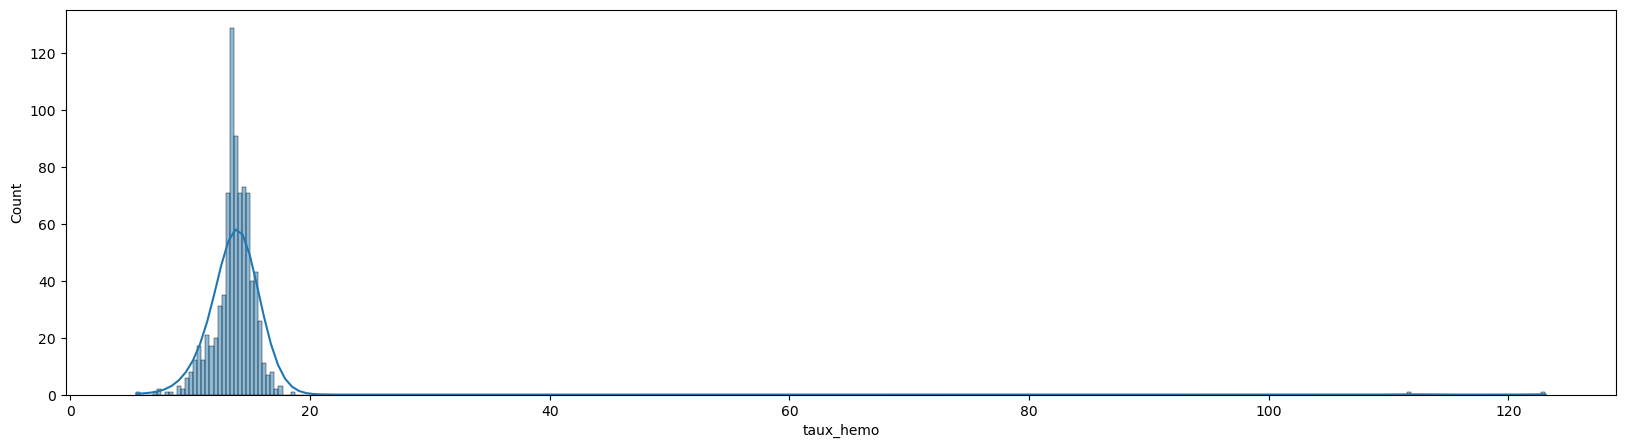

In [34]:
#Graphe de distribution
plt.figure(figsize=(20,5))
sns.histplot(dat1["taux_hemo"],kde=True)
plt.show()

In [35]:
from scipy.stats import kurtosis, skew

#Test de leptokurtique pour connaitre la strategie de remplacement des valeurs manquante
missing_data=dat1["taux_hemo"].isna()
kurt=kurtosis(dat1["taux_hemo"][~missing_data].to_numpy())

#Test de skewness pour evaluer l'asymetrie de la distribution

top=skew(dat1["taux_hemo"][~missing_data].to_numpy())

kurt,top

(350.1001327285743, 17.88654239272564)

## Conclusion sur le choix de remplacement
##### On remarque que le taux_hemo persente un kurtosis elevé,cela indique la presence des valeurs aberrantes de meme le skewness est positive cela veut dire que la queue de droitw de la distribution est plus grande ce qui montre la presence des valeurs etremes

#### Conclusion sur le choix de la methode:KNN

### K.Traitement des colonnes 'raison d'indisponiblilite et Raison_de_non-eligibilité_totale

In [36]:
# affichage des valeurs uniques sur la colonne Raison indisponibilité  [Est sous anti-biothérapie  ]
dat1["Raison indisponibilité  [Est sous anti-biothérapie  ]"].unique()

array([nan, 'Non', 'Oui'], dtype=object)

In [37]:
# Fonction qui remplace les valeurs "Non" par des valeurs manquantes (NaN)
def replace_non_by_nan(col):
    col = col.astype(str).replace(["Non", "nan"], pd.NA)
    return col


In [38]:
# apllication de la fonction replace_non_by_nan à la colonne "Raison indisponibilité  [Est sous anti-biothérapie  ]"de dat1
dat1["Raison indisponibilité  [Est sous anti-biothérapie  ]"] = replace_non_by_nan(dat1["Raison indisponibilité  [Est sous anti-biothérapie  ]"])

# valeurs uniques  de la colonne "Raison indisponibilité  [Est sous anti-biothérapie  ]" de dat1
dat1["Raison indisponibilité  [Est sous anti-biothérapie  ]"].unique()

array([<NA>, 'Oui'], dtype=object)

#### Creation d'une colonne combine raison d'indisponibilite

#### Justification du choix de combinaison des colonnes

In [39]:
# Création de la colonne combinée
def regrouper_raisons(row):
    raisons = []
    if pd.notna(row["Raison indisponibilité  [Taux d’hémoglobine bas ]"]):
        raisons.append("Taux d’hémoglobine bas")
    if pd.notna(row["Raison indisponibilité  [date de dernier Don < 3 mois ]"]):
        raisons.append("date de dernier Don < 3 mois")
    if pd.notna(row['Raison indisponibilité  [Est sous anti-biothérapie  ]']): 
        raisons.append("Est sous anti-biothérapie")
    if pd.notna(row['Raison indisponibilité  [IST récente (Exclu VIH, Hbs, Hcv)]']): 
        raisons.append("IST récente (Exclu VIH, Hbs, Hcv)")
    if pd.notna(row['Raison de l’indisponibilité de la femme [La DDR est mauvais si <14 jour avant le don]']): 
        raisons.append("La DDR est mauvais si <14 jour avant le don")
    if pd.notna(row['Raison de non-eligibilité totale  [Antécédent de transfusion]']): 
        raisons.append("Antécédent de transfusion")
    if pd.notna(row['Raison de non-eligibilité totale  [Porteur(HIV,hbs,hcv)]']): 
        raisons.append("Porteur(HIV,hbs,hcv)")
    if pd.notna(row['Raison de non-eligibilité totale  [Opéré]']): 
        raisons.append("Opéré")
    if pd.notna(row['Raison de non-eligibilité totale  [Drepanocytaire]']): 
        raisons.append("Drepanocytaire")
    if pd.notna(row['Raison de non-eligibilité totale  [Diabétique]']): 
        raisons.append("Diabétique")
    if pd.notna(row['Raison de non-eligibilité totale  [Hypertendus]']): 
        raisons.append("Hypertendus")
    if pd.notna(row['Raison de non-eligibilité totale  [Asthmatiques]']): 
        raisons.append("Asthmatiques")
    if pd.notna(row['Raison de non-eligibilité totale  [Cardiaque]']): 
        raisons.append("Cardiaque")
    if pd.notna(row['Raison de non-eligibilité totale  [Tatoué]']): 
        raisons.append("Tatoué")
    if pd.notna(row['Raison de non-eligibilité totale  [Scarifié]']):
        raisons.append("Scarifié") 
             
    if pd.notna(row['Si autres raison préciser']):
        raisons.append(row['Si autres raison préciser'])
    if pd.notna(row["Autre raisons,  preciser"]):
        raisons.append(row["Autre raisons,  preciser"])
        
    return ', '.join(raisons) if raisons else "aucune"

dat1['raison_indisponibilite'] = dat1.apply(regrouper_raisons, axis=1)

In [40]:
dat1['raison_indisponibilite']

0                                                  aucune
1                                                  aucune
2                                                  aucune
3                                                  aucune
4                                                  aucune
                              ...                        
1910                               Taux d’hémoglobine bas
1911                               Taux d’hémoglobine bas
1912                            Est sous anti-biothérapie
1913                               Taux d’hémoglobine bas
1914    Antécédent de transfusion, Porteur(HIV,hbs,hcv...
Name: raison_indisponibilite, Length: 1879, dtype: object

In [41]:
# valeurs uniques de la colonne "ÉLIGIBILITÉ AU DON." de df1
dat1["ÉLIGIBILITÉ AU DON."].unique()

#nombre de valeures manquantes
dat1["ÉLIGIBILITÉ AU DON."].isna().sum()

0

### L.Traitemnent de la colonne nationalite

In [42]:
dat1["Nationalité"].isna().sum()

0

In [43]:

# Mettre toutes les valeurs en minuscules
dat1["Nationalité"] = dat1["Nationalité"].astype(str).str.lower()

# Enlever (e) à la fin des métiers grace aux expressions regulières
dat1["Nationalité"]=dat1["Nationalité"].str.replace(r"\(e\)$", "", regex=True)
dat1["Nationalité"]

0       camerounaise
1       camerounaise
2       camerounaise
3       camerounaise
4       camerounaise
            ...     
1910           r a s
1911    camerounaise
1912    camerounaise
1913           r a s
1914           r a s
Name: Nationalité, Length: 1879, dtype: object

In [44]:
result=collections.Counter(dat1["Nationalité"])
result

Counter({'camerounaise': 1822,
         'r a s': 29,
         'r a s ': 8,
         'ras': 5,
         'centrafricaine': 4,
         'malien': 2,
         'r.a.s': 2,
         ' r a s': 2,
         'malienne': 1,
         'non precisé': 1,
         'rien': 1,
         'americaine': 1,
         'tchadienne': 1})

In [45]:
dat1["Nationalité"]=dat1["Nationalité"].replace("r.a.s","r a s")
dat1["Nationalité"]=dat1["Nationalité"].replace("ras","r a s")
dat1["Nationalité"]=dat1["Nationalité"].replace("r a s ","r a s")
dat1["Nationalité"]=dat1["Nationalité"].replace(" r a s","r a s")
dat1["Nationalité"]=dat1["Nationalité"].replace("r a s","rien")
dat1["Nationalité"]=dat1["Nationalité"].replace("non precisé","rien")
dat1["Nationalité"]=dat1["Nationalité"].replace("malienne","malien")

In [46]:
result=collections.Counter(dat1["Nationalité"])
result

Counter({'camerounaise': 1822,
         'rien': 48,
         'centrafricaine': 4,
         'malien': 3,
         'americaine': 1,
         'tchadienne': 1})

#### Si oui preciser la date du dernier don.

In [47]:
# affichage des valeurs de la colonne Si oui preciser la date du dernier don.
dat1["Si oui preciser la date du dernier don."].sample(10)

73                      NaN
1847                    NaN
1340                    NaN
16                      NaN
1233    2000-10-17 00:00:00
1360                    NaN
1504    2019-08-15 00:00:00
320                     NaN
1019                    NaN
439     2018-10-22 00:00:00
Name: Si oui preciser la date du dernier don., dtype: object

In [48]:
# valeurs uniques de la colonne Si oui preciser la date du dernier don.
dat1["Si oui preciser la date du dernier don."].unique()

array([datetime.datetime(2017, 1, 1, 0, 0),
       datetime.datetime(2019, 2, 26, 0, 0),
       datetime.datetime(2009, 1, 1, 0, 0), nan,
       datetime.datetime(2018, 8, 7, 0, 0),
       datetime.datetime(2018, 2, 1, 0, 0),
       datetime.datetime(2018, 3, 17, 0, 0),
       datetime.datetime(2018, 6, 1, 0, 0),
       datetime.datetime(2020, 2, 29, 0, 0),
       datetime.datetime(2011, 1, 1, 0, 0),
       datetime.datetime(2018, 4, 1, 0, 0),
       datetime.datetime(2018, 1, 1, 0, 0),
       datetime.datetime(2018, 2, 6, 0, 0),
       datetime.datetime(2018, 5, 25, 0, 0),
       datetime.datetime(2018, 9, 1, 0, 0),
       datetime.datetime(2017, 3, 17, 0, 0),
       datetime.datetime(2014, 1, 1, 0, 0),
       datetime.datetime(2002, 1, 1, 0, 0),
       datetime.datetime(1999, 1, 1, 0, 0),
       datetime.datetime(2013, 1, 1, 0, 0),
       datetime.datetime(2018, 10, 15, 0, 0),
       datetime.datetime(2018, 9, 15, 0, 0),
       datetime.datetime(2005, 1, 1, 0, 0),
       datetime.dat

In [49]:
# conversion de la colonne Si oui preciser la date du dernier don en datetime
dat1["Si oui preciser la date du dernier don."]=pd.to_datetime(dat1["Si oui preciser la date du dernier don."],errors="coerce") 

In [50]:
# affichage des valeurs manquantes de la colonne Si oui preciser la date du dernier don.
dat1["Si oui preciser la date du dernier don."].isna().sum()

1100

#### Date de dernières règles (DDR) 

In [163]:
# affichage des valeurs de la colonne Date de dernières règles (DDR) 
dat1["Date de dernières règles (DDR) "].sample(10)

1677   2019-06-05
1611          NaT
83            NaT
1662          NaT
1654          NaT
193           NaT
1604          NaT
1903   2019-01-25
893           NaT
977           NaT
Name: Date de dernières règles (DDR) , dtype: datetime64[ns]

In [51]:
# affichage du nombre de valeurs manquantes de la colonne Date de dernières règles (DDR)
dat1["Date de dernières règles (DDR) "].isna().sum()

1840

### L.Suppression des colonnes qui ne seront plus utiles

In [52]:
dat1.columns.tolist()

['Date de remplissage de la fiche',
 'Date de naissance',
 "Niveau d'etude",
 'Genre',
 'Taille',
 'Poids',
 'Situation Matrimoniale (SM)',
 'Profession',
 'Arrondissement de résidence',
 'Quartier de Résidence',
 'Nationalité',
 'Religion',
 'A-t-il (elle) déjà donné le sang',
 'Si oui preciser la date du dernier don.',
 'Taux d’hémoglobine',
 'ÉLIGIBILITÉ AU DON.',
 'Raison indisponibilité  [Est sous anti-biothérapie  ]',
 'Raison indisponibilité  [Taux d’hémoglobine bas ]',
 'Raison indisponibilité  [date de dernier Don < 3 mois ]',
 'Raison indisponibilité  [IST récente (Exclu VIH, Hbs, Hcv)]',
 'Date de dernières règles (DDR) ',
 'Raison de l’indisponibilité de la femme [La DDR est mauvais si <14 jour avant le don]',
 'Raison de l’indisponibilité de la femme [Allaitement ]',
 'Raison de l’indisponibilité de la femme [A accoucher ces 6 derniers mois  ]',
 'Raison de l’indisponibilité de la femme [Interruption de grossesse  ces 06 derniers mois]',
 'Raison de l’indisponibilité de la

In [53]:
dat2019=dat1.drop(['Date de naissance',
 'Quartier de Résidence',
 'Religion',
 'Raison indisponibilité  [Est sous anti-biothérapie  ]',
 'Raison indisponibilité  [Taux d’hémoglobine bas ]',
 'Raison indisponibilité  [date de dernier Don < 3 mois ]',
 'Raison indisponibilité  [IST récente (Exclu VIH, Hbs, Hcv)]',
 'Raison de l’indisponibilité de la femme [La DDR est mauvais si <14 jour avant le don]',
 'Raison de l’indisponibilité de la femme [Allaitement ]',
 'Raison de l’indisponibilité de la femme [A accoucher ces 6 derniers mois  ]',
 'Raison de l’indisponibilité de la femme [Interruption de grossesse  ces 06 derniers mois]',
 'Raison de l’indisponibilité de la femme [est enceinte ]',
 'Autre raisons,  preciser',
 'Sélectionner "ok" pour envoyer',
 'Raison de non-eligibilité totale  [Antécédent de transfusion]',
 'Raison de non-eligibilité totale  [Porteur(HIV,hbs,hcv)]',
 'Raison de non-eligibilité totale  [Opéré]',
 'Raison de non-eligibilité totale  [Drepanocytaire]',
 'Raison de non-eligibilité totale  [Diabétique]',
 'Raison de non-eligibilité totale  [Hypertendus]',
 'Raison de non-eligibilité totale  [Asthmatiques]',
 'Raison de non-eligibilité totale  [Cardiaque]',
 'Raison de non-eligibilité totale  [Tatoué]',
 'Raison de non-eligibilité totale  [Scarifié]',
 'Si autres raison préciser'],axis=1)

In [54]:
dat2019

,Date de remplissage de la fiche,Niveau d'etude,Genre,Taille,Poids,Situation Matrimoniale (SM),Profession,Arrondissement de résidence,Nationalité,A-t-il (elle) déjà donné le sang,...,Taux d’hémoglobine,ÉLIGIBILITÉ AU DON.,Date de dernières règles (DDR),Age,Categorie_metier,Quartier de Résidence Corrigé,ville,Croyance,taux_hemo,raison_indisponibilite
0,2019-03-11,Pas Précisé,Homme,NaN,NaN,célibataire,chaudronnier,douala 3,camerounaise,Oui,...,NaN,Eligible,NaT,20.0,Métier non classé,LOGBABA,douala,Pas Précisé,NaN,aucune
1,2019-03-21,Universitaire,Homme,NaN,NaN,marié,secrétaire comptable,douala,camerounaise,Oui,...,NaN,Eligible,NaT,41.0,Métier non classé,NDOGPASSI 2,douala,Ne de nouveau,NaN,aucune
2,1977-12-25 00:00:00,Secondaire,Femme,NaN,NaN,marié,commerçant,douala,camerounaise,Oui,...,NaN,Eligible,NaT,42.0,Métier non classé,DAKAR,douala,Catholique,NaN,aucune
3,1986-02-06 00:00:00,Secondaire,Homme,NaN,NaN,célibataire,homme d’affaire,douala 5,camerounaise,Non,...,NaN,Eligible,NaT,33.0,Métier non classé,NGANGUE,douala,Pas Précisé,NaN,aucune
4,1988-05-20 00:00:00,Pas Précisé,Homme,NaN,NaN,célibataire,beat maker,douala,camerounaise,Non,...,13.6,Eligible,NaT,31.0,Métier non classé,DOUALA,douala,Catholique,13.6,aucune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,2019-05-06 00:00:00,Universitaire,Homme,NaN,NaN,célibataire,r a s,douala 5,rien,Non,...,NaN,Temporairement Non-eligible,NaT,37.0,Métier non classé,NDOGBOM,douala,Catholique,NaN,Taux d’hémoglobine bas
1911,2019-12-09 00:00:00,Secondaire,Homme,NaN,NaN,célibataire,hotelier,douala 2,camerounaise,Non,...,NaN,Temporairement Non-eligible,NaT,28.0,Métier non classé,NEW BELL,douala,Protestant,NaN,Taux d’hémoglobine bas
1912,2019-12-06 00:00:00,Secondaire,Homme,NaN,NaN,célibataire,commerçant,douala 3,camerounaise,Non,...,14.3,Temporairement Non-eligible,NaT,22.0,Métier non classé,YASSA,douala,Pas Précisé,14.3,Est sous anti-biothérapie
1913,2019-05-15 00:00:00,Universitaire,Homme,NaN,NaN,célibataire,technicien genie civil,douala 5,rien,Non,...,NaN,Temporairement Non-eligible,NaT,28.0,Métier non classé,BEPANDA,douala,Pas Précisé,NaN,Taux d’hémoglobine bas


In [55]:
#supprimer les colonnes tailles et poids
dat2019.drop(['Taille','Poids'],axis=1,inplace=True)

In [56]:
# affichage de dat2019
dat2019

,Date de remplissage de la fiche,Niveau d'etude,Genre,Situation Matrimoniale (SM),Profession,Arrondissement de résidence,Nationalité,A-t-il (elle) déjà donné le sang,Si oui preciser la date du dernier don.,Taux d’hémoglobine,ÉLIGIBILITÉ AU DON.,Date de dernières règles (DDR),Age,Categorie_metier,Quartier de Résidence Corrigé,ville,Croyance,taux_hemo,raison_indisponibilite
0,2019-03-11,Pas Précisé,Homme,célibataire,chaudronnier,douala 3,camerounaise,Oui,2017-01-01,NaN,Eligible,NaT,20.0,Métier non classé,LOGBABA,douala,Pas Précisé,NaN,aucune
1,2019-03-21,Universitaire,Homme,marié,secrétaire comptable,douala,camerounaise,Oui,2019-02-26,NaN,Eligible,NaT,41.0,Métier non classé,NDOGPASSI 2,douala,Ne de nouveau,NaN,aucune
2,1977-12-25 00:00:00,Secondaire,Femme,marié,commerçant,douala,camerounaise,Oui,2009-01-01,NaN,Eligible,NaT,42.0,Métier non classé,DAKAR,douala,Catholique,NaN,aucune
3,1986-02-06 00:00:00,Secondaire,Homme,célibataire,homme d’affaire,douala 5,camerounaise,Non,NaT,NaN,Eligible,NaT,33.0,Métier non classé,NGANGUE,douala,Pas Précisé,NaN,aucune
4,1988-05-20 00:00:00,Pas Précisé,Homme,célibataire,beat maker,douala,camerounaise,Non,NaT,13.6,Eligible,NaT,31.0,Métier non classé,DOUALA,douala,Catholique,13.6,aucune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,2019-05-06 00:00:00,Universitaire,Homme,célibataire,r a s,douala 5,rien,Non,NaT,NaN,Temporairement Non-eligible,NaT,37.0,Métier non classé,NDOGBOM,douala,Catholique,NaN,Taux d’hémoglobine bas
1911,2019-12-09 00:00:00,Secondaire,Homme,célibataire,hotelier,douala 2,camerounaise,Non,NaT,NaN,Temporairement Non-eligible,NaT,28.0,Métier non classé,NEW BELL,douala,Protestant,NaN,Taux d’hémoglobine bas
1912,2019-12-06 00:00:00,Secondaire,Homme,célibataire,commerçant,douala 3,camerounaise,Non,NaT,14.3,Temporairement Non-eligible,NaT,22.0,Métier non classé,YASSA,douala,Pas Précisé,14.3,Est sous anti-biothérapie
1913,2019-05-15 00:00:00,Universitaire,Homme,célibataire,technicien genie civil,douala 5,rien,Non,NaT,NaN,Temporairement Non-eligible,NaT,28.0,Métier non classé,BEPANDA,douala,Pas Précisé,NaN,Taux d’hémoglobine bas


In [60]:
# affichage du nombre de valeur manquantes de dat2019
dat2019.isna().sum()

Date de remplissage de la fiche               0
Niveau d'etude                                0
Genre                                         0
Situation Matrimoniale (SM)                   0
Profession                                    0
Arrondissement de résidence                   0
Nationalité                                   0
A-t-il (elle) déjà donné le sang              0
Si oui preciser la date du dernier don.    1100
Taux d’hémoglobine                          838
ÉLIGIBILITÉ AU DON.                           0
Date de dernières règles (DDR)             1840
Age                                          20
Categorie_metier                              0
Quartier de Résidence Corrigé                 0
ville                                         0
Croyance                                      0
taux_hemo                                     0
raison_indisponibilite                        0
dtype: int64

In [57]:
# remplacemenent des valeur manquantes dans la colonne "Taux d’hémoglobine" par la moyenne
dat2019["taux_hemo"].fillna(dat2019["taux_hemo"].mean(),inplace=True)

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_10096\467208197.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dat2019["taux_hemo"].fillna(dat2019["taux_hemo"].mean(),inplace=True)


In [61]:
# enregistrement du jeu de données dat2019 dans un fichier csv 
dat2019.to_csv("dat2019.csv",index=False)

## <span style= "font-family: Papyrus; font_size: 1em; font-style: underline; "> 🔻Step 2.2 | Pretraitement des données de la table Volontaire:dat3</span>

In [ ]:
dat3

,ID,Age,Horodateur,Niveau_d'etude,Genre_,Taille_,Poids,Situation_Matrimoniale_(SM),Profession_,Arrondissement_de_résidence_,...,"Raison_de_non-eligibilité_totale__[Porteur(HIV,hbs,hcv)]",Raison_de_non-eligibilité_totale__[Opéré],Raison_de_non-eligibilité_totale__[Drepanocytaire],Raison_de_non-eligibilité_totale__[Diabétique],Raison_de_non-eligibilité_totale__[Hypertendus],Raison_de_non-eligibilité_totale__[Asthmatiques],Raison_de_non-eligibilité_totale__[Cardiaque],Raison_de_non-eligibilité_totale__[Tatoué],Raison_de_non-eligibilité_totale__[Scarifié],Si_autres_raison_préciser_
0,DONOR_1842,24,46:44.9,Universitaire,Homme,NaN,NaN,Célibataire,Etudiant (e),Douala 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DONOR_1843,23,44:19.0,Universitaire,Homme,NaN,NaN,Célibataire,Sans Emplois,R A S,...,Non,Oui,Non,Non,Non,Non,Non,Non,Non,NaN
2,DONOR_1844,41,46:54.3,Aucun,Homme,NaN,NaN,Marié (e),Tailleur,Douala 1,...,Non,Non,Non,Non,Non,Non,Non,Non,Non,Aucune information
3,DONOR_1845,24,29:29.7,Universitaire,Homme,NaN,NaN,Célibataire,Etudiant,Douala 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DONOR_1846,30,47:47.4,Secondaire,Homme,NaN,NaN,Célibataire,Militaire,Douala (Non précisé ),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,DONOR_3683,26,31:07.0,Secondaire,Homme,NaN,NaN,Célibataire,Élève,Douala 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1842,DONOR_3684,23,29:02.4,Secondaire,Homme,NaN,NaN,Célibataire,Élève,Douala (Non précisé ),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1843,DONOR_3685,30,33:42.3,Universitaire,Homme,NaN,NaN,Célibataire,Technicien superieur,Douala (Non précisé ),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1844,DONOR_3686,28,02:54.5,Pas Précisé,Femme,NaN,96.0,Célibataire,Estheticien,Douala (Non précisé ),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dat3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 40 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   ID                                                                                         1846 non-null   object 
 1   Age                                                                                        1846 non-null   int64  
 2   Horodateur                                                                                 1846 non-null   object 
 3   Niveau_d'etude                                                                             1846 non-null   object 
 4   Genre_                                                                                     1846 non-null   object 
 5   Taille_                                         

### A.Etude de la colonne Age

In [ ]:
dat3["Age"].isna().sum() #nombre de valeures manquantes dans age

np.int64(0)

### B.Etude de la colonne Horodateur

In [ ]:
dat3["Horodateur"].isna().sum() #nombre de valeures manquantes dans horodateur

np.int64(0)

### D.Etude de la colonne Niveau d'etude

In [ ]:
dat3["Niveau_d'etude"].isna().sum() #nombre de valeures manquantes dans 'niveau d'etude

np.int64(0)

### E.Etude de la colonne Genre

In [ ]:
dat3["Genre_"].isna().sum() #nombre de valeures manquantes dans "Genre"

np.int64(0)

### F.Modification de la colonne Taille par imputation des valeurs manquantes

In [ ]:
100*(dat3["Taille_"].isna().sum()/dat3.shape) #pourcentage de valeur manquantes

array([  96.74972914, 4465.        ])

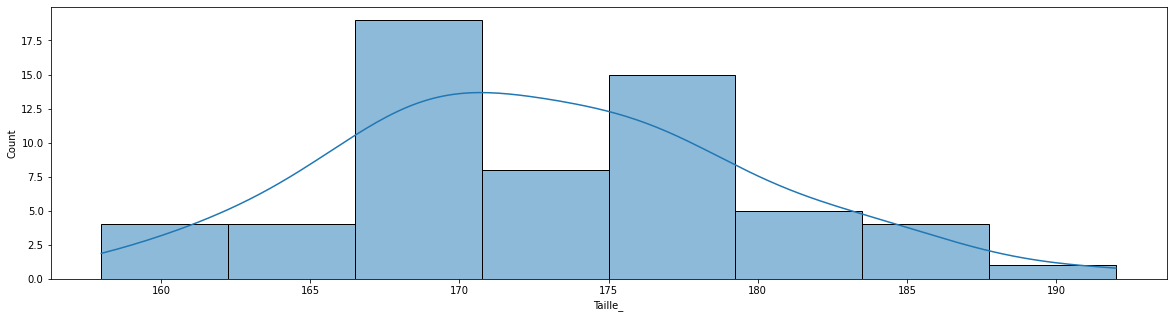

In [ ]:
plt.figure(figsize=(20,5))
sns.histplot(dat3["Taille_"],kde=True)
plt.show()

In [ ]:
#Test de leptokurtique pour connaitre la strategie de remplacement des valeurs manquante
missing_data=dat3["Taille_"].isna()
kurt=kurtosis(dat3["Taille_"][~missing_data].to_numpy())

#Test de skewness pour evaluer l'asymetrie de la distribution

top=skew(dat3["Taille_"][~missing_data].to_numpy())

kurt,top

(np.float64(-0.03743045586059068), np.float64(0.325591801743969))

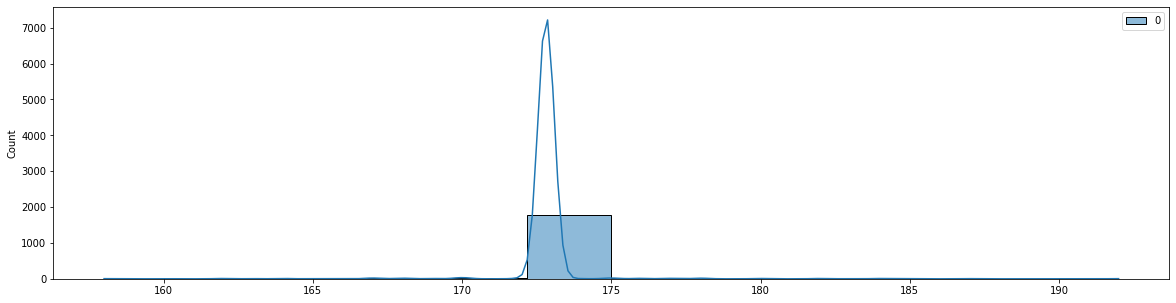

In [ ]:
#Imputation par la methode multiple
imput=IterativeImputer(random_state=0) #initialisation de l'imputeeur
dat31=imput.fit_transform(dat3[["Taille_"]]) #application a la colonne taille_
#dat3["Taille_"].isna().sum()
plt.figure(figsize=(20,5))
sns.histplot(dat31,kde=True)
plt.show()

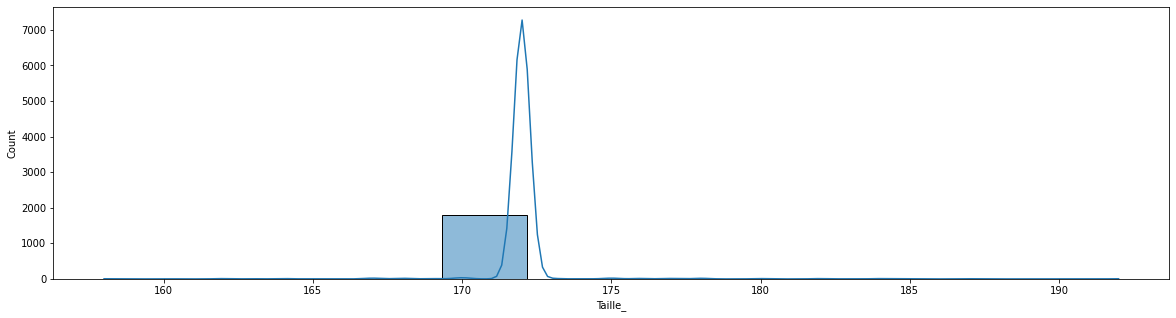

In [ ]:
mediane1=dat3["Taille_"].median(skipna=True)
dat32=dat3["Taille_"].fillna(mediane1)
plt.figure(figsize=(20,5))
sns.histplot(dat32,kde=True)
plt.show()

#### Conclusion du choix de la methode d'imputation :par la mediane

In [ ]:
dat3["Taille_"]=dat32

### G.Modification de la colonne Poids par imputation des valeurs manquantes

In [ ]:
100*(dat3["Poids"].isna().sum()/dat3.shape) #pourcentage de valeur manquantes

array([  94.36619718, 4355.        ])

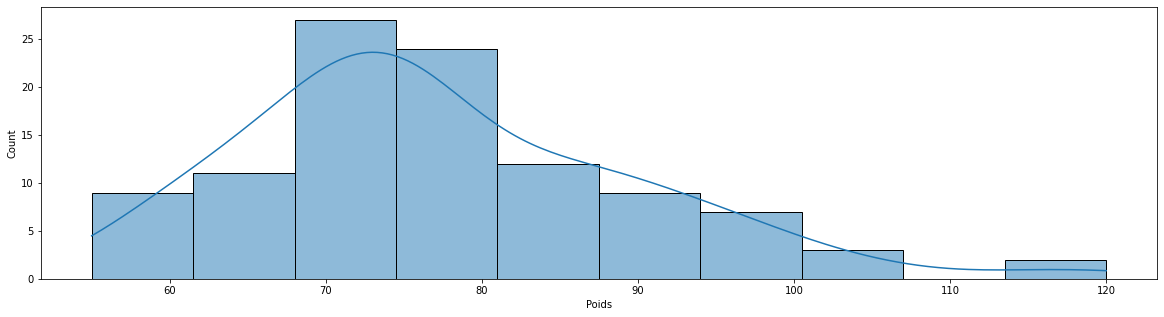

In [ ]:
plt.figure(figsize=(20,5))
sns.histplot(dat3["Poids"],kde=True)
plt.show()

In [ ]:
#Test de leptokurtique pour connaitre la strategie de remplacement des valeurs manquante
missing_data=dat3["Poids"].isna()
kurt=kurtosis(dat3["Poids"][~missing_data].to_numpy())

#Test de skewness pour evaluer l'asymetrie de la distribution

top=skew(dat3["Poids"][~missing_data].to_numpy())

kurt,top

(np.float64(0.7658643623384811), np.float64(0.8276212325406241))

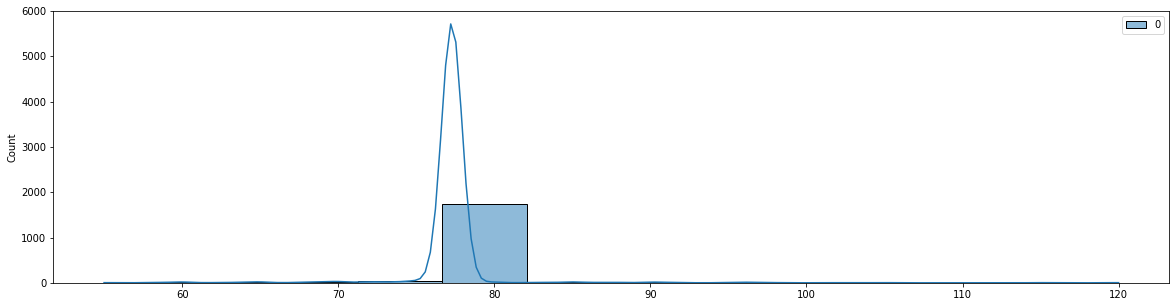

In [ ]:
#Imputation par la methode multiple
imput=IterativeImputer(random_state=0) #initialisation de l'imputeeur
dt3=imput.fit_transform(dat3[["Poids"]]) #application a la colonne taux_hemo
#dat3["Poids"].isna().sum()
plt.figure(figsize=(20,5))
sns.histplot(dt3,kde=True)
plt.show()

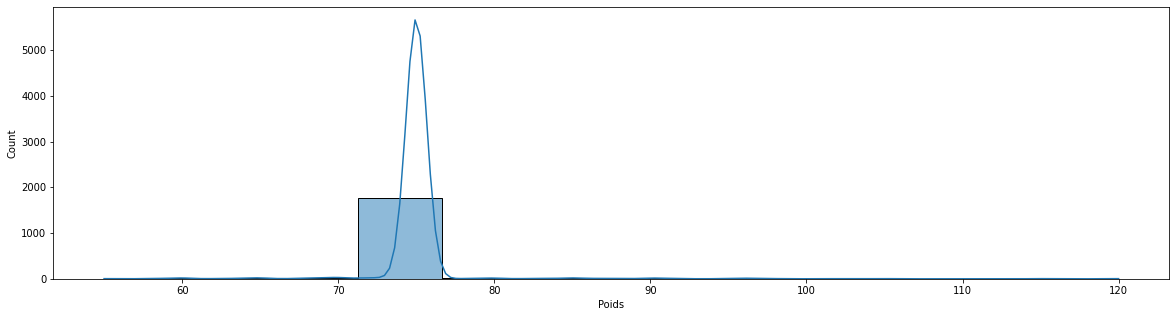

In [ ]:
mediane1=dat3["Poids"].median(skipna=True)
da3=dat3["Poids"].fillna(mediane1)
plt.figure(figsize=(20,5))
sns.histplot(da3,kde=True)
plt.show()

#### Conclusion du choix de la methode d'imputation :par la mediane

In [ ]:
dat3["Poids"]=da3

### H.Modification de la colonne Profession et situation matrimoniale

In [ ]:
# Mettre toutes les valeurs en minuscules
dat3["Profession_"] = dat3["Profession_"].astype(str).str.lower()

# Enlever (e) à la fin des métiers grace aux expressions regulières
dat3["Profession_"]=dat3["Profession_"].str.replace(r"\(e\)$", "", regex=True)
dat3["Profession_"]

0                  etudiant 
1               sans emplois
2                  tailleur 
3                   etudiant
4                  militaire
                ...         
1841                   élève
1842                  élève 
1843    technicien superieur
1844             estheticien
1845             électricien
Name: Profession_, Length: 1846, dtype: object

In [ ]:
dat3["Profession_"].isna().sum()

np.int64(0)

In [ ]:
# Mettre toutes les valeurs en minuscules
dat3["Situation_Matrimoniale_(SM)"] = dat3["Situation_Matrimoniale_(SM)"].astype(str).str.lower()

# Enlever (e) à la fin des métiers grace aux expressions regulières
dat3["Situation_Matrimoniale_(SM)"]=dat3["Situation_Matrimoniale_(SM)"].str.replace(r"\(e\)$", "", regex=True)
dat3["Situation_Matrimoniale_(SM)"]

0       célibataire
1       célibataire
2            marié 
3       célibataire
4       célibataire
           ...     
1841    célibataire
1842    célibataire
1843    célibataire
1844    célibataire
1845    célibataire
Name: Situation_Matrimoniale_(SM), Length: 1846, dtype: object

In [ ]:
dat3["Situation_Matrimoniale_(SM)"].isna().sum()

np.int64(0)

### I.Extraction de l'obediance dans la table volontaire

In [ ]:
dat3["Croyance"]=dat3["Religion_"].apply(Extrac_text) 
dat3["Croyance"]

0                 Catholique
1                 Catholique
2                Pas Précisé
3                   Musulman
4                 Adventiste
                ...         
1841    Chrétien non précisé
1842             Pas Précisé
1843                Musulman
1844             Pas Précisé
1845              Catholique
Name: Croyance, Length: 1846, dtype: object

### J.Etude sur la colonne taux hemoglobines

In [ ]:
dat3["taux_hemo"]=dat3["Taux_d’hémoglobine_"].apply(extract_value)
dat3["taux_hemo"]=pd.to_numeric(dat3["taux_hemo"],errors="coerce")
dat3["taux_hemo"].isna().sum()

np.int64(829)

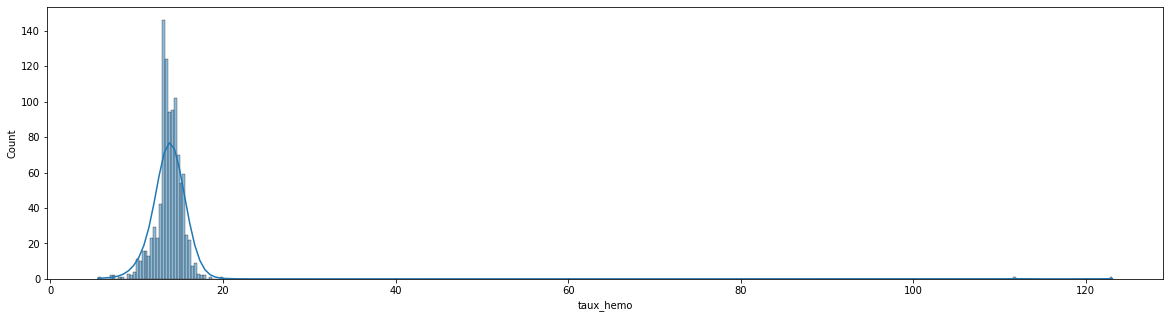

In [ ]:
#Graphe de distribution
plt.figure(figsize=(20,5))
sns.histplot(dat3["taux_hemo"],kde=True)
plt.show()

In [ ]:
#Test de leptokurtique pour connaitre la strategie de remplacement des valeurs manquante
missing_data=dat3["taux_hemo"].isna()
kurt=kurtosis(dat3["taux_hemo"][~missing_data].to_numpy())

#Test de skewness pour evaluer l'asymetrie de la distribution

top=skew(dat3["taux_hemo"][~missing_data].to_numpy())

kurt,top

(np.float64(414.796459547075), np.float64(19.33995329839824))

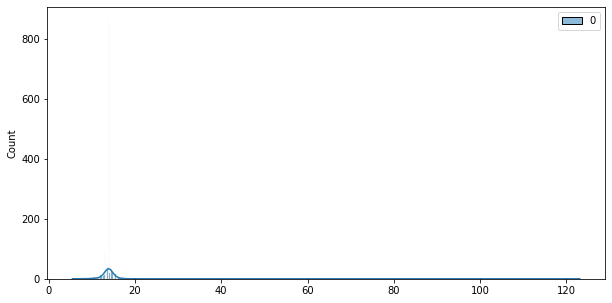

In [ ]:
#Imputation par la methode multiple
imput=IterativeImputer(random_state=0) #initialisation de l'imputeeur
df=imput.fit_transform(dat3[["taux_hemo"]]) #application a la colonne taux_hemo
#dat3["taux_hemo"].isna().sum()
plt.figure(figsize=(10,5))
sns.histplot(df,kde=True)
plt.show()

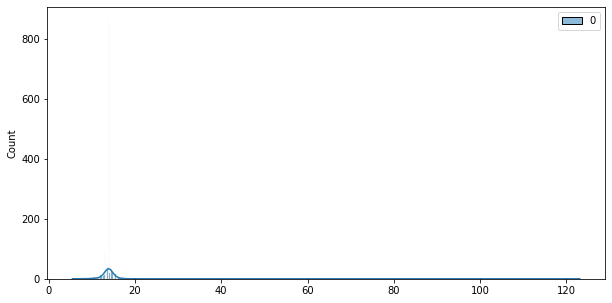

In [ ]:
#initialisation de l'imputeeur

imput1=KNNImputer(n_neighbors=2)
df0=imput1.fit_transform(dat3[["taux_hemo"]])
#dat3["taux_hemo"].isna().sum()
plt.figure(figsize=(10,5))
sns.histplot(df0,kde=True)
plt.show()

#### Choix de remplacement par la methode multiple

In [ ]:
dat3["taux_hemo"]=df

### K.Traitement des colonnes 'raison d'indisponiblilite et Raison_de_non-eligibilité_totale

In [ ]:
# Création de la colonne combinée
def regrouper_raisons(row):
    raisons = []
    if pd.notna(row["Raison_indisponibilité__[Taux_d’hémoglobine_bas_]"]):
        raisons.append("Taux_d’hémoglobine_bas_")
    if pd.notna(row["Raison_indisponibilité__[date_de_dernier_Don_<_3_mois_]"]):
        raisons.append("date_de_dernier_Don_<_3_mois_")
    if pd.notna(row['Raison_indisponibilité__[Est_sous_anti-biothérapie__]']): 
        raisons.append("Est_sous_anti-biothérapie__")
    if pd.notna(row['Raison_indisponibilité__[IST_récente_(Exclu_VIH,_Hbs,_Hcv)]']): 
        raisons.append("IST récente (Exclu VIH, Hbs, Hcv)")
    if pd.notna(row['Raison_de_l’indisponibilité_de_la_femme_[La_DDR_est_mauvais_si_<14_jour_avant_le_don]']): 
        raisons.append("La DDR est mauvais si <14 jour avant le don")
    if pd.notna(row['Raison_de_l’indisponibilité_de_la_femme_[Allaitement_]']): 
        raisons.append("Allaitement_")
    if pd.notna(row['Raison_de_l’indisponibilité_de_la_femme_[A_accoucher_ces_6_derniers_mois__]']): 
        raisons.append("A_accoucher_ces_6_derniers_mois__") 
    if pd.notna(row['Raison_de_l’indisponibilité_de_la_femme_[Interruption_de_grossesse__ces_06_derniers_mois]']): 
        raisons.append("Interruption_de_grossesse__ces_06_derniers_mois")
    if pd.notna(row['Raison_de_l’indisponibilité_de_la_femme_[est_enceinte_]']): 
        raisons.append("est_enceinte_")    
    if pd.notna(row['Raison_de_non-eligibilité_totale__[Antécédent_de_transfusion]']): 
        raisons.append("Antécédent de transfusion")
    if pd.notna(row['Raison_de_non-eligibilité_totale__[Porteur(HIV,hbs,hcv)]']): 
        raisons.append("Porteur(HIV,hbs,hcv)")
    if pd.notna(row['Raison_de_non-eligibilité_totale__[Opéré]']): 
        raisons.append("Opéré")
    if pd.notna(row['Raison_de_non-eligibilité_totale__[Drepanocytaire]']): 
        raisons.append("Drepanocytaire")
    if pd.notna(row['Raison_de_non-eligibilité_totale__[Diabétique]']): 
        raisons.append("Diabétique")
    if pd.notna(row['Raison_de_non-eligibilité_totale__[Hypertendus]']): 
        raisons.append("Hypertendus")
    if pd.notna(row['Raison_de_non-eligibilité_totale__[Asthmatiques]']): 
        raisons.append("Asthmatiques")
    if pd.notna(row['Raison_de_non-eligibilité_totale__[Cardiaque]']): 
        raisons.append("Cardiaque")
    if pd.notna(row['Raison_de_non-eligibilité_totale__[Tatoué]']): 
        raisons.append("Tatoué")
    if pd.notna(row['Raison_de_non-eligibilité_totale__[Scarifié]']):
        raisons.append("Scarifié") 
             
    if pd.notna(row['Si_autres_raison_préciser_']):
        raisons.append(row['Si_autres_raison_préciser_'])
    if pd.notna(row["Autre_raisons,__preciser_"]):
        raisons.append(row["Autre_raisons,__preciser_"])
        
    return ', '.join(raisons) if raisons else "aucune"

dat3['raison_indisponibilite'] = dat3.apply(regrouper_raisons, axis=1)

In [ ]:
dat3['raison_indisponibilite']

0                                                  aucune
1       Antécédent de transfusion, Porteur(HIV,hbs,hcv...
2       Antécédent de transfusion, Porteur(HIV,hbs,hcv...
3                                                  aucune
4                                                  aucune
                              ...                        
1841                                               aucune
1842                                               aucune
1843                                               aucune
1844                                               aucune
1845                                               aucune
Name: raison_indisponibilite, Length: 1846, dtype: object

In [ ]:
dat3['raison_indisponibilite'].isna().sum()

np.int64(0)

### L.Etrude de la colonne Nationalite_

In [ ]:
result=collections.Counter(dat3["Nationalité_"])
result

Counter({'Camerounaise': 1796,
         'R A S': 27,
         'Malien': 2,
         'RAS': 3,
         'Tchadienne': 1,
         'R.A.S': 2,
         'Centrafricaine': 3,
         'R A S ': 7,
         'Malienne': 1,
         'CENTRAFRICAINE': 1,
         'AMERICAINE': 1,
         'Non precisé': 1,
         'Ras': 1})

In [ ]:
dat3["Nationalité_"].isna().sum()
# Mettre toutes les valeurs en minuscules
dat3["Nationalité_"] = dat3["Nationalité_"].astype(str).str.lower()

# Enlever (e) à la fin des métiers grace aux expressions regulières
dat3["Nationalité_"]=dat3["Nationalité_"].str.replace(r"\(e\)$", "", regex=True)

dat3["Nationalité_"]=dat3["Nationalité_"].replace("r.a.s","r a s")
dat3["Nationalité_"]=dat3["Nationalité_"].replace("ras","r a s")
dat3["Nationalité_"]=dat3["Nationalité_"].replace("r a s ","r a s")
dat3["Nationalité_"]=dat3["Nationalité_"].replace(" r a s","r a s")
dat3["Nationalité_"]=dat3["Nationalité_"].replace("r a s","rien")
dat3["Nationalité_"]=dat3["Nationalité_"].replace("non precisé","rien")
dat3["Nationalité_"]=dat3["Nationalité_"].replace("malienne","malien")
result=collections.Counter(dat3["Nationalité_"])
result

Counter({'camerounaise': 1796,
         'rien': 41,
         'malien': 3,
         'tchadienne': 1,
         'centrafricaine': 4,
         'americaine': 1})

In [ ]:
dat3["Nationalité_"].isna().sum()

np.int64(0)

### M.Modification de arrondissement de residence et quartier

#### Quartier de residence

In [ ]:
# Afficher les valeurs de la colonne "Quartier de Résidence"
print(dat3["Quartier_de_Résidence_"].unique())

['YASSA' 'R A S' 'NEW BELL' 'ANGE RAPHAEL' 'BEEDI' 'DEIDO' 'HENRY'
 'NON PRÉCISÉ' 'ANCIEN 3IEME' 'NDOGPASSI' 'DOUALA' 'JAPOMA' 'BONADIBONG'
 'ANGE RAPHAËL' 'CITE SIC' 'BESSEKE BONABERI' 'AKWA NGODI' 'YAOUNDE'
 'PK14' 'MEIGANGA' 'R .A.S' 'VILLAGE' 'CITÉ MAETUDE' 'PAS PRECISE'
 'NDOGBONG' 'PK9' 'DEÏDO' 'BRAZZAVILLE' 'NYALLA CHATEAU' 'LOGBABA'
 'BANGUE' 'BONAMOUSSADI' 'BEEDI MALANGUE' 'ANCIEN ABATOIRE' 'BONABERIE'
 'LOGBESSOU' 'NEWBELL' 'NDOGPASSI 3' 'BOKO' 'LOGPOM' 'NYALLA'
 'NYALLA PARISO' 'YOUPWE' 'CITE CICAM' 'BONABERI' 'PK10' 'NDOGPASSI 2'
 'AKWA' 'EDEA' 'PK8' 'YATCHIKA' 'PK12 EMMENE CITE' 'BONAMOUSADI'
 'BDOGPASSI' 'NYALLA JAPOMA' 'PK11 BASSA' 'EDÉA' 'PK11' 'NKONGMONDO'
 'CITÉ SIC' 'MAKEPE' 'PK 10' 'TOTAL NKOLBONG' 'PK12' 'BALI' 'YAOUNDÉ'
 'NGODI BAKOKO' 'BONAPRISO 2' 'KOTTO' 'CITE DES PALMIERS' 'PAS PRECISÉ'
 'NIALLA' 'BILONGUE' 'SAINT THOMAS' 'PK13' 'CCC NDOKOTTI'
 'BONABÉRI (GRAND BAOBAB)' 'BEPENDA OMNISPORT' 'BESSENGUE' 'DOGPASSI'
 'RAS' 'NKOLBONG' 'CITÉ-SIC' 'BESENGUE' 'BONABÉR

In [ ]:
# Compter les valeurs manquantes
dat3["Quartier_de_Résidence_"].isnull().sum()

np.int64(0)

In [ ]:
# Noms des quartiers en minuscule
dat3["Quartier_de_Résidence_"] = dat3["Quartier_de_Résidence_"].astype(str).str.strip().str.lower()

# Extraire les quartiers uniques après nettoyage
quartiers_uniques = sorted(dat3["Quartier_de_Résidence_"])

# Afficher les résultats
print("Quartiers uniques  :", quartiers_uniques)

Quartiers uniques  : ['akoua', 'akwa', 'akwa', 'akwa', 'akwa', 'akwa', 'akwa', 'akwa', 'akwa', 'akwa', 'akwa', 'akwa', 'akwa', 'akwa', 'akwa', 'akwa', 'akwa ngodi', 'akwa nord', 'akwa nord', 'akwa nord', 'akwa nord', 'akwa-nord', 'akwa-nord', 'akwa-nord', 'ambiance', 'ancien 3ieme', 'ancien abatoire', 'ange rafael', 'ange rafael', 'ange rafael', 'ange rafael', 'ange rafael', 'ange rafael', 'ange raphael', 'ange raphael', 'ange raphael', 'ange raphael', 'ange raphael campus 2', 'ange raphaël', 'ange raphaël', 'ange raphaël', 'ange raphaël', 'anhe rafael', 'ari', 'ari', 'ari', 'ari', 'ari', 'ari village', 'aucun', 'axe lourd bependa', 'bafoussam', 'bahan', 'bakie ndagpassi', 'bakoko', 'bakoko', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bali', 'bangapongo', 'bangue', 'bassa', 'bastos', 'bdogpassi', 'beedi', 'beedi', 'beedi', 'beedi', 'beedi

In [ ]:
# Dictionnaire de correction des quartiers 
corrections_quartiers = {
    ('akoua', 'akwa', 'akwa ngodi', 'akwa nord'): "akwa",
    
    ('ange raphael', 'ange raphael campus 2','ange raphaël','anhe rafael'): "ange-raphael",
     
    ('ari', 'ari village','carrefour ari','carrefour agip'): "ari",
    ('beedi', 'beedi malangue'): "beedi",
    
    ('axe lourd bependa',  'bepanda omnisport', 'bepanda omnisports','bependa aeroport','bependa maturite', 'bependa tonnerre','bependa casmando','bependa','bepanda'): "bependa",
    ('besengue', 'bessengue', 'essengue', 'gare bessengue'): "bessengue",
    ('billongue', 'bilongue'): "bilongue",
    
    ('binamoussadi','bonamoussadi','sable bonamoussadi') : "bonamoussadi",
    ('bois de singe', 'bois des singes'):'bois des singes',
    
    ('boko', 'boko cogefar', 'boko plage','boko village', 'boko-plage','kambo boko'): 'boko',
    ('bonabeerie', 'besseke bonaberi','bonaberi','bonaberi entree cebec', 'bonaberi ndoba', 'bonaberi ndobo', 'bonaberi sctm','bonabéri',
     'bonabéri', 'bonabéri (grand baobab)', 'bonabéri grand-hangar'): "bonaberi",
    
    ('bona priso goupwe','bonadouma-bonapriso', 'bonaorisso', 'bonapriso','bonapriso 2', 'bonapriso rue koloko','rue koloko bonapriso'): "bonapriso",
    ('bonandjo', 'bonanjo'):"bonandjo",
    
    ('bonateki', 'bonateki deido','deido','deïdo', 'déido'):"deido",
    
    ('borne 10', 'borne 10 village','cité belge','cite berge', 'ipd', 'itba village', 'village','tradex village', 'village borne 10', 'village cite de bille'
     , 'village entrée bille', 'village entrée lycée', 'village marche', 'village marché', 'villoage marche','shele village', 'she’ll village', 'she’ll-village'): "village",
    
    ('bp cite', 'bp cité', 'bp site', 'bp8232'):"bp-cité",
    ('brassaville', 'brazaville', 'brazzaville'):"brazaville",
    ('ccc', 'ccc ndokotti','douala ccc','ndokoti', 'ndokotti','ndokotti ccc','rond point ccc'):"ndokotti",
    
    ('cite cic','cite cicam','cite de cille', 'cite de bille','cite sic','cité maetude', 'cité sic', 'cité-sic', 'cité-sic bassa','nouvelle route cité sic'):"cite cic",
    ('cite de palmier', 'cite des pakmiers', 'cite des palmiers','citee des palmiers','cité des palmiers'):"cité des palmiers",
    ('cogefar', 'combi', 'congefar','entrée mini cité cogefar','village cogefar'): "cogefar",
    
    ( 'bakie ndagpassi','bdogpassi', 'dogbassi', 'dogbassi 3', 'dogpassi','douala ndogpassi', 'douala ndopassiz','ndobassi',
     'ndobassi 2', 'ndog passi 3', 'ndog-passi','ndogbassi','ndogpass 3', 'ndogpassi', 'ndogpassi i', 'ndogpassi ii', 'ndogpassi iii',
     'ndogpassi marché', 'ndogpassi village', 'ndogpassi3', 'ndogpassi3', 'ndogpassiii', 'ndogpossi','ndogpassi 1', 'ndogpassi 2', 'ndogpassi 3',
     'ndokpassi'):"ndogpassi",
    
    ('dibom iii', 'dibombari', 'diboum 3'):"dibombari",
    ('douala','douala douala','douala 812.12','douala non précisé','douala(non) précisé', 'douala-douala', 'douala-zone de reeassement'):"inconnu-douala",
    ('douala newbell', 'douala newtown  aéroport', 'new bel','new bell','new bell bassa', 'new priso', 'new ton aeroport',
     'new town aéroport', 'new-bell','new-bell /nkouloulou', 'new-deido','newbell','newton  airport', 'newton aeroport', 'newton aéroport',
     'nkoulouloun','pk5', 'pk5 new bell'): "newbell",
    
    ('nyalla', 'douala nyalla','nialla','nyala', 'nyala château', 'nyalla chateau', 'nyalla haoussa', 'nyalla japoma', 'nyalla kambo 2',
     'nyalla pariazo','nyalla pariso', 'nyalla pays bas', 'nyalla-kambo','parisot nyalla', 'nyassa', 'nylon', 'nylon brazzaville', 'nylon brazzaville', 'n’y alla pariso'): "nyalla",
    
    ( 'edea', 'edéa','édea'):"édéa",
    ('elf', 'elf (rond point)'): "elf",
    ('douala oyack','oyack'): "oyack",
    ('enri', 'entree bille', 'entree billes'): "entrée billes", 
    ('entree chinoise', 'entrée chinois','entrée chinois'): "entrée chinoise",
    ('harry', 'harry yassa', 'henry'): "yassa",
    ('hôpital général', 'hôpital général de douala'): "hopital général",
    ('japoma', 'japouma'): "japoma",
    ('jardin logbaba','jardin ndogmbe', 'journaliste','log baba', 'log-baba', 'logbaba','logbaba jardin', 'logbaba plateau', 'logbaba saint thomas', 'logbaba st thomad', 'saint thomas', 'saint thomas logbaba'): "logbaba",
    ('kms', 'kotto', 'kotto bonamoussadi', 'kotto immeuble', 'kotto- chefferie') : "kotto",
    ('logbesou', 'logbessou') : "logbessou" ,
    ('makepe', 'makepe misoke', 'makepe missoke', 'makèpè') : "makepe" ,
    ('ndg-bong','ndobo','ndobong','ndogbong citadelle', 'ndongbong') : "ndongbong",
    ( 'ndogsibi', 'ndogsimbi','ndogssimbi') :"ndogssimbi",
    ('ngodi', 'ngodi akwa','ngodi bakogo','ngodi bakoko', 'ngodi bonomo', 'ngodi- akwa', 'ngodi- bakoko'):"ngodi",
    ('nkol mbong','nkolbon', 'nkolbong', 'total nkolobong', 'total nkolbong', 'total nkolmbon') : "nkolbong", 
    ('nkomondo', 'nkong mondo', 'nkong-mondo', 'nkongmondo', 'nkonguondo', 'nkonmondo') : "nkomondo",
    ('nkouabang'): "nkoabang",
    ('non precise', 'non precisé','non précisé','pas mentionné', 'pas precise','pas précisé','pas precisé','pihidibamba', 'r a s', 'r .a.s','ras','rien'): "non précisé",
    ("pk8", 'pk 8 entrée laïque') : "pk8",
    ('pk 10','pk10'):"pk 10",
    ('pk 13','pk13', 'pk13 bassa'):"pk 13",
    ('pk 16','pk16','pk16 nsape', 'pk16(sappe )'):"pk 16",
    ('pk11','pk11 bassa', 'pk11 mbengue city'): "pk11",
    ("pk12",'pk12 emmene cite','pk12 mandjab','pl12') : "pk12",
    ('yassa','yassa tika') : "yassa",
    ('yaounde', 'yaoundé'): "inconnu-yaounde",
    ('yatchika', 'yatika') : "yatchika",
    ('tradex borne 10', 'tradex kotto') : "kotto",
    ('tergal', 'tergale') : "tergal" , 
    ('soboum', 'soboum-dakar','souboun'): "soboum",
    ('terminus', 'terminus saint michel', 'terminus ucb') : "terminus",
    ('song mahop', 'songmahop'): "songmahop",
    ( 'texaco aeroport', 'texaco aéroport', 'total aeroport'): "texaco aeroport",
    ('yansoki','yansoki bakoko') : "yansoki",
    ('tradex bonne dix', 'tradex borne 10') : "borne 10",
}

# Fonction de correction
def corriger_quartier(quartier):
    quartier = quartier.upper().strip()
    for keys, valeur_corrigee in corrections_quartiers.items():
        if quartier in keys:
            return valeur_corrigee
    return quartier

# Appliquer la correction
dat3["Quartier_de_Résidence_"] = dat3["Quartier_de_Résidence_"].apply(corriger_quartier)


In [ ]:
dat3["Quartier_de_Résidence_"].unique()

array(['YASSA', 'R A S', 'NEW BELL', 'ANGE RAPHAEL', 'BEEDI', 'DEIDO',
       'HENRY', 'NON PRÉCISÉ', 'ANCIEN 3IEME', 'NDOGPASSI', 'DOUALA',
       'JAPOMA', 'BONADIBONG', 'ANGE RAPHAËL', 'CITE SIC',
       'BESSEKE BONABERI', 'AKWA NGODI', 'YAOUNDE', 'PK14', 'MEIGANGA',
       'R .A.S', 'VILLAGE', 'CITÉ MAETUDE', 'PAS PRECISE', 'NDOGBONG',
       'PK9', 'DEÏDO', 'BRAZZAVILLE', 'NYALLA CHATEAU', 'LOGBABA',
       'BANGUE', 'BONAMOUSSADI', 'BEEDI MALANGUE', 'ANCIEN ABATOIRE',
       'BONABERIE', 'LOGBESSOU', 'NEWBELL', 'NDOGPASSI 3', 'BOKO',
       'LOGPOM', 'NYALLA', 'NYALLA PARISO', 'YOUPWE', 'CITE CICAM',
       'BONABERI', 'PK10', 'NDOGPASSI 2', 'AKWA', 'EDEA', 'PK8',
       'YATCHIKA', 'PK12 EMMENE CITE', 'BONAMOUSADI', 'BDOGPASSI',
       'NYALLA JAPOMA', 'PK11 BASSA', 'EDÉA', 'PK11', 'NKONGMONDO',
       'CITÉ SIC', 'MAKEPE', 'PK 10', 'TOTAL NKOLBONG', 'PK12', 'BALI',
       'YAOUNDÉ', 'NGODI BAKOKO', 'BONAPRISO 2', 'KOTTO',
       'CITE DES PALMIERS', 'PAS PRECISÉ', 'NIALLA', 'B

#### Modification de la colonne arrondissement

In [ ]:
# Noms des arrondissement en minuscule
dat3["Arrondissement_de_résidence_"] = dat3["Arrondissement_de_résidence_"].astype(str).str.strip().str.lower()
dat3["Arrondissement_de_résidence_"].unique()
dat3["Arrondissement_de_résidence_"]=dat3["Arrondissement_de_résidence_"].replace("deido","douala 1")
dat3["Arrondissement_de_résidence_"]=dat3["Arrondissement_de_résidence_"].replace("oyack","douala 3")
dat3["Arrondissement_de_résidence_"]=dat3["Arrondissement_de_résidence_"].replace("nkouabang","nkolafamba")
dat3["Arrondissement_de_résidence_"]=dat3["Arrondissement_de_résidence_"].replace("dschang","penka michel")
dat3["Arrondissement_de_résidence_"]=dat3["Arrondissement_de_résidence_"].replace("west","ouest")
dat3["Arrondissement_de_résidence_"]=dat3["Arrondissement_de_résidence_"].replace("r a s","ras")
dat3["Arrondissement_de_résidence_"]=dat3["Arrondissement_de_résidence_"].replace("pas precise","non precisé")
dat3["Arrondissement_de_résidence_"]=dat3["Arrondissement_de_résidence_"].replace("non précisé","non precisé")
dat3["Arrondissement_de_résidence_"]=dat3["Arrondissement_de_résidence_"].replace("pas précisé","non precisé")
dat3["Arrondissement_de_résidence_"]=dat1["Arrondissement de résidence"].replace("yaoundé","yaounde")
dat3["Arrondissement_de_résidence_"]=dat3["Arrondissement_de_résidence_"].replace("douala (non précisé )","douala")
dat3["Arrondissement_de_résidence_"]=dat3["Arrondissement_de_résidence_"].replace("bomono ba mbegue","dibombari")
dat3["Arrondissement_de_résidence_"]=dat3["Arrondissement_de_résidence_"].replace("dcankongmondo","douala 1")
dat3["Arrondissement_de_résidence_"]=dat3["Arrondissement_de_résidence_"].replace("ngodi bakoko","douala 3")
dat3["Arrondissement_de_résidence_"]=dat3["Arrondissement_de_résidence_"].replace("pas mentionné","non precisé")
resultat=collections.Counter(dat3["Arrondissement_de_résidence_"])
resultat

Counter({'douala 3': 395,
         'douala': 947,
         'douala 5': 209,
         'douala 1': 73,
         'yaounde': 14,
         'douala 2': 76,
         'douala 4': 60,
         'bafoussam': 1,
         'penka michel': 1,
         'non precisé': 25,
         'buea': 3,
         'kribi': 2,
         'njombe': 1,
         'tiko': 1,
         'edea': 11,
         'manjo': 1,
         'ouest': 1,
         'nkolafamba': 1,
         'douala 6': 3,
         'batie': 1,
         'dibombari': 1,
         'meiganga': 2,
         'sud ouest tombel': 1,
         'ras': 14,
         'limbe': 1,
         'boko': 1})

### L.Suppression des colonnes qui ne seront plus utiles

In [ ]:
dat3.columns.tolist()

['ID',
 'Age',
 'Horodateur',
 "Niveau_d'etude",
 'Genre_',
 'Taille_',
 'Poids',
 'Situation_Matrimoniale_(SM)',
 'Profession_',
 'Arrondissement_de_résidence_',
 'Quartier_de_Résidence_',
 'Nationalité_',
 'Religion_',
 'A-t-il_(elle)_déjà_donné_le_sang_',
 'Si_oui_preciser_la_date_du_dernier_don._',
 'Taux_d’hémoglobine_',
 'ÉLIGIBILITÉ_AU_DON.',
 'Raison_indisponibilité__[Est_sous_anti-biothérapie__]',
 'Raison_indisponibilité__[Taux_d’hémoglobine_bas_]',
 'Raison_indisponibilité__[date_de_dernier_Don_<_3_mois_]',
 'Raison_indisponibilité__[IST_récente_(Exclu_VIH,_Hbs,_Hcv)]',
 'Date_de_dernières_règles_(DDR)__',
 'Raison_de_l’indisponibilité_de_la_femme_[La_DDR_est_mauvais_si_<14_jour_avant_le_don]',
 'Raison_de_l’indisponibilité_de_la_femme_[Allaitement_]',
 'Raison_de_l’indisponibilité_de_la_femme_[A_accoucher_ces_6_derniers_mois__]',
 'Raison_de_l’indisponibilité_de_la_femme_[Interruption_de_grossesse__ces_06_derniers_mois]',
 'Raison_de_l’indisponibilité_de_la_femme_[est_encei

In [ ]:
dat_Volontaire=dat3.drop(['ID',
 'Religion_',
 'Si_oui_preciser_la_date_du_dernier_don._',
 'Taux_d’hémoglobine_',
 'Raison_indisponibilité__[Est_sous_anti-biothérapie__]',
 'Raison_indisponibilité__[Taux_d’hémoglobine_bas_]',
 'Raison_indisponibilité__[date_de_dernier_Don_<_3_mois_]',
 'Raison_indisponibilité__[IST_récente_(Exclu_VIH,_Hbs,_Hcv)]',
 'Date_de_dernières_règles_(DDR)__',
 'Raison_de_l’indisponibilité_de_la_femme_[La_DDR_est_mauvais_si_<14_jour_avant_le_don]',
 'Raison_de_l’indisponibilité_de_la_femme_[Allaitement_]',
 'Raison_de_l’indisponibilité_de_la_femme_[A_accoucher_ces_6_derniers_mois__]',
 'Raison_de_l’indisponibilité_de_la_femme_[Interruption_de_grossesse__ces_06_derniers_mois]',
 'Raison_de_l’indisponibilité_de_la_femme_[est_enceinte_]',
 'Autre_raisons,__preciser_',
 'Sélectionner_"ok"_pour_envoyer_',
 'Raison_de_non-eligibilité_totale__[Antécédent_de_transfusion]',
 'Raison_de_non-eligibilité_totale__[Porteur(HIV,hbs,hcv)]',
 'Raison_de_non-eligibilité_totale__[Opéré]',
 'Raison_de_non-eligibilité_totale__[Drepanocytaire]',
 'Raison_de_non-eligibilité_totale__[Diabétique]',
 'Raison_de_non-eligibilité_totale__[Hypertendus]',
 'Raison_de_non-eligibilité_totale__[Asthmatiques]',
 'Raison_de_non-eligibilité_totale__[Cardiaque]',
 'Raison_de_non-eligibilité_totale__[Tatoué]',
 'Raison_de_non-eligibilité_totale__[Scarifié]',
 'Si_autres_raison_préciser_'],axis=1)

In [ ]:
dat_Volontaire

,Age,Horodateur,Niveau_d'etude,Genre_,Taille_,Poids,Situation_Matrimoniale_(SM),Profession_,Arrondissement_de_résidence_,Quartier_de_Résidence_,Nationalité_,A-t-il_(elle)_déjà_donné_le_sang_,ÉLIGIBILITÉ_AU_DON.,Croyance,taux_hemo,raison_indisponibilite
0,24,46:44.9,Universitaire,Homme,172.0,75.0,célibataire,etudiant,douala 3,YASSA,camerounaise,Non,Eligible,Catholique,13.908555,aucune
1,23,44:19.0,Universitaire,Homme,172.0,75.0,célibataire,sans emplois,douala,R A S,rien,Oui,Définitivement non-eligible,Catholique,10.800000,"Antécédent de transfusion, Porteur(HIV,hbs,hcv..."
2,41,46:54.3,Aucun,Homme,172.0,75.0,marié,tailleur,douala,NEW BELL,camerounaise,Non,Définitivement non-eligible,Pas Précisé,13.908555,"Antécédent de transfusion, Porteur(HIV,hbs,hcv..."
3,24,29:29.7,Universitaire,Homme,172.0,75.0,célibataire,etudiant,douala 5,ANGE RAPHAEL,camerounaise,Non,Eligible,Musulman,15.000000,aucune
4,30,47:47.4,Secondaire,Homme,172.0,75.0,célibataire,militaire,douala,BEEDI,camerounaise,Oui,Eligible,Adventiste,13.908555,aucune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,26,31:07.0,Secondaire,Homme,172.0,75.0,célibataire,élève,douala 3,NDOGBONG,camerounaise,Non,Eligible,Chrétien non précisé,13.908555,aucune
1842,23,29:02.4,Secondaire,Homme,172.0,75.0,célibataire,élève,douala 3,PK14,camerounaise,Oui,Eligible,Pas Précisé,13.908555,aucune
1843,30,33:42.3,Universitaire,Homme,172.0,75.0,célibataire,technicien superieur,douala 5,CITE DES PALMIERS,camerounaise,Oui,Eligible,Musulman,13.400000,aucune
1844,28,02:54.5,Pas Précisé,Femme,172.0,96.0,célibataire,estheticien,douala 5,DOUALA DOUALA,camerounaise,Non,Eligible,Pas Précisé,12.000000,aucune


## <span style= "font-family: Papyrus; font_size: 1em; font-style: underline; "> 🔻Step 2.3 | Pretraitement des données de la table dat2: 2020</span>

In [ ]:
dat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Horodateur                    1900 non-null   datetime64[ns]
 1   Sexe                          1900 non-null   object        
 2   Age                           1900 non-null   object        
 3   Type de donation              1679 non-null   object        
 4   Groupe Sanguin ABO / Rhesus   1900 non-null   object        
 5   Phenotype                     1900 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 89.2+ KB


In [ ]:
dat2.columns.tolist()

['Horodateur',
 'Sexe',
 'Age ',
 'Type de donation',
 'Groupe Sanguin ABO / Rhesus ',
 'Phenotype ']

### A.Etude de la colonne horodateur

In [ ]:
dat2

,Horodateur,Sexe,Age,Type de donation,Groupe Sanguin ABO / Rhesus,Phenotype
0,2020-07-16 19:02:33.994,M,26,F,B+,"RH-2, RH+4, RH-3, RH+5, -kell1"
1,2020-07-16 19:05:51.521,M,24,F,O+,"RH-2, RH+4, RH-3, RH+5, -kell1"
2,2020-07-17 04:52:09.054,M,41,F,A+,"RH+2, RH+4, RH-3, RH+5, -kell1"
3,2020-07-17 04:56:03.200,M,20,F,O+,"RH-2, RH+4, RH-3, RH+5, -kell1"
4,2020-07-17 05:49:40.730,M,34,F,O+,"RH-2, RH+4, RH+3, RH+5, -kell1"
...,...,...,...,...,...,...
1895,2020-07-24 07:53:15.946,M,29,F,O-,"RH-2, RH+4, RH-3, RH+5, -kell1"
1896,2020-07-24 07:54:15.813,M,35,F,O-,"RH-2, RH+4, RH-3, RH+5, -kell1"
1897,2020-07-24 07:55:10.564,M,21,F,A+,"RH-2, RH+4, RH-3, RH+5, -kell1"
1898,2020-07-24 07:56:35.829,F,19,F,O+,"RH+2, RH+4, RH-3, RH+5, -kell1"


In [ ]:
dat2["Horodateur"].isna().sum()

np.int64(0)

In [ ]:
dat2["Horodateur"]

0      2020-07-16 19:02:33.994
1      2020-07-16 19:05:51.521
2      2020-07-17 04:52:09.054
3      2020-07-17 04:56:03.200
4      2020-07-17 05:49:40.730
                 ...          
1895   2020-07-24 07:53:15.946
1896   2020-07-24 07:54:15.813
1897   2020-07-24 07:55:10.564
1898   2020-07-24 07:56:35.829
1899   2020-07-24 07:57:53.581
Name: Horodateur, Length: 1900, dtype: datetime64[ns]

In [ ]:
dat2["Horodateur"]=dat2["Horodateur"].dt.strftime("%H:%M:%S")
dat2["Horodateur"]

0       19:02:33
1       19:05:51
2       04:52:09
3       04:56:03
4       05:49:40
          ...   
1895    07:53:15
1896    07:54:15
1897    07:55:10
1898    07:56:35
1899    07:57:53
Name: Horodateur, Length: 1900, dtype: object

### B.Etude de la colonne Sexe

In [ ]:
dat2["Sexe"].isna().sum()

np.int64(0)

In [ ]:
dat2.columns.tolist()

['Horodateur',
 'Sexe',
 'Age ',
 'Type de donation',
 'Groupe Sanguin ABO / Rhesus ',
 'Phenotype ']

In [ ]:
colect=collections.Counter(dat2["Sexe"])
colect

Counter({'M': 1755, 'F': 145})

### C.Etude de la colonne Age

In [ ]:
colect1=collections.Counter(dat2["Age "])
colect1

Counter({26: 94,
         24: 89,
         41: 37,
         20: 56,
         34: 73,
         46: 15,
         19: 51,
         40: 42,
         28: 70,
         38: 60,
         29: 112,
         37: 57,
         39: 54,
         32: 83,
         42: 33,
         22: 73,
         27: 92,
         31: 78,
         25: 88,
         33: 80,
         43: 42,
         50: 14,
         47: 10,
         45: 21,
         44: 18,
         30: 88,
         36: 66,
         35: 82,
         23: 83,
         53: 5,
         21: 47,
         51: 9,
         48: 10,
         54: 5,
         58: 3,
         25673051888: 1,
         59: 4,
         57: 6,
         56: 2,
         '00': 8,
         49: 7,
         55: 4,
         18: 20,
         52: 3,
         '2O': 1,
         0: 3,
         '4&': 1})

In [ ]:
dat2["Age "]=dat2["Age "].replace(25673051888.0,25)

In [ ]:
dat2["Age "].isna().sum()

np.int64(0)

In [ ]:
dat2["Age "]=pd.to_numeric(dat2["Age "],errors="coerce")

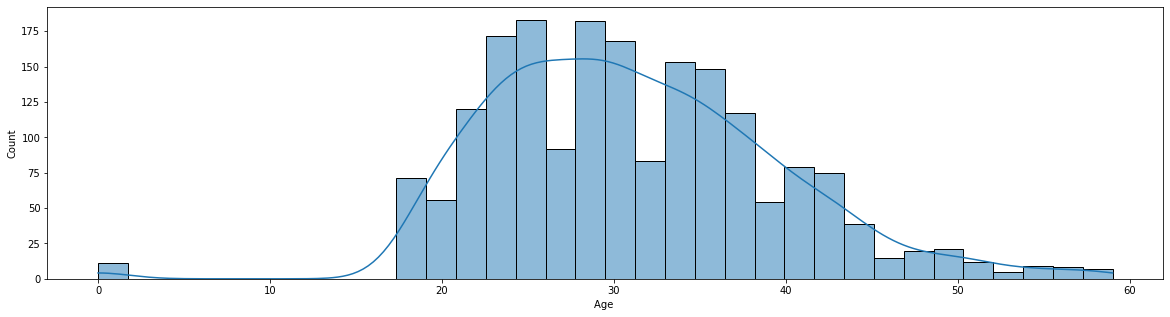

In [ ]:
mediane1=dat2["Age "].median(skipna=True)
dat2["Age "]=dat2["Age "].fillna(mediane1)
plt.figure(figsize=(20,5))
sns.histplot(dat2["Age "],kde=True)
plt.show()

### E.Etude de la colonne type de donateur

In [ ]:
colect1=collections.Counter(dat2["Type de donation"])
colect1

Counter({'F': 1624, nan: 221, 'B': 55})

#### Remplacement des valeurs manquantes

In [ ]:
for col in dat2.columns:
    dat2["Type de donation"]=dat2["Type de donation"].fillna(dat2["Type de donation"].mode()[0])
dat2["Type de donation"].isna().sum()    

np.int64(0)

### F.Etude de la colonne Groupe sanguin ABO/Rhesus

In [ ]:
resul=collections.Counter(dat2["Groupe Sanguin ABO / Rhesus "])
resul

Counter({'B+': 357,
         'O+': 935,
         'A+': 449,
         'AB+': 70,
         'O-': 57,
         'B-': 15,
         'A-': 14,
         'AB-': 3})

In [ ]:
dat2["Groupe Sanguin ABO / Rhesus "].isna().sum()

np.int64(0)

### G.Etude de la colonne phenotype

In [ ]:
collecti=collections.Counter(dat2["Phenotype "])
collecti

Counter({'RH-2, RH+4, RH-3, RH+5, -kell1': 1271,
         'RH+2, RH+4, RH-3, RH+5, -kell1': 287,
         'RH-2, RH+4, RH+3, RH+5, -kell1': 261,
         'RH-2, RH+2, RH-3, RH+5, -kell1': 1,
         'RH+2, RH-4, RH-3, RH+5, -kell1': 4,
         'RH-2, RH-4, RH-3, RH+5, -kell1': 3,
         'RH-2, RH+4, RH-3, RH-5, RH+5': 1,
         'RH+2, RH+4, RH+3, RH+5, +kell1': 4,
         'RH+2, RH+4, RH+3, RH+5, -kell1': 42,
         'RH-2, RH+4, RH+3, RH-5, -kell1': 18,
         'RH-2, RH+4, RH-3, RH+5, +kell1': 2,
         'RH-2, RH+4, RH-3, RH-5, -kell1': 3,
         'RH+2, RH+4, RH-3, RH-5, RH+5': 2,
         'RH+2, RH+4, RH+3, RH-5, -kell1': 1})

In [ ]:
dat2["Phenotype "].isna().sum()

np.int64(0)

# <span style= "font-family: Papyrus; font_size: 1em; font-style: underline; "> 🔻Step 3 | Visualisation des donnees</span>

In [156]:
dat1

,Date de remplissage de la fiche,Niveau d'etude,Genre,Situation Matrimoniale (SM),Profession,Arrondissement de résidence,Quartier de Résidence,Nationalité,Religion,A-t-il (elle) déjà donné le sang,...,Raison de non-eligibilité totale [Cardiaque],Raison de non-eligibilité totale [Tatoué],Raison de non-eligibilité totale [Scarifié],Si autres raison préciser,Age,Categorie_metier,ville,Croyance,taux_hemo,raison_indisponibilite
0,2019-03-11,Pas Précisé,Homme,célibataire,chaudronnier,douala 3,logbaba,camerounaise,Pas Précisé,Oui,...,NaN,NaN,NaN,NaN,20.0,Métier non classé,douala,Pas Précisé,NaN,aucune
1,2019-03-21,Universitaire,Homme,marié,secrétaire comptable,douala (non précisé ),ndogpassi 2,camerounaise,Chretien (Ne de nouveau),Oui,...,NaN,NaN,NaN,NaN,41.0,Métier non classé,douala (non precise ),Ne de nouveau,NaN,aucune
2,1977-12-25 00:00:00,Secondaire,Femme,marié,commerçant,douala (non précisé ),dakar,camerounaise,Chretien (Catholique),Oui,...,NaN,NaN,NaN,NaN,42.0,Métier non classé,douala (non precise ),Catholique,NaN,aucune
3,1986-02-06 00:00:00,Secondaire,Homme,célibataire,homme d’affaire,douala 5,ngangue,camerounaise,Pas Précisé,Non,...,NaN,NaN,NaN,NaN,33.0,Métier non classé,douala,Pas Précisé,NaN,aucune
4,1988-05-20 00:00:00,Pas Précisé,Homme,célibataire,beat maker,douala (non précisé ),douala,camerounaise,Chretien (Catholique),Non,...,NaN,NaN,NaN,NaN,31.0,Métier non classé,douala (non precise ),Catholique,13.6,aucune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,2019-05-06 00:00:00,Universitaire,Homme,célibataire,r a s,douala 5,ndogbom,rien,Chretien (Catholique),Non,...,NaN,NaN,NaN,NaN,37.0,Métier non classé,douala,Catholique,NaN,Taux d’hémoglobine bas
1911,2019-12-09 00:00:00,Secondaire,Homme,célibataire,hotelier,douala 2,new bell,camerounaise,Chretien (Protestant ),Non,...,NaN,NaN,NaN,NaN,28.0,Métier non classé,douala,Protestant,NaN,Taux d’hémoglobine bas
1912,2019-12-06 00:00:00,Secondaire,Homme,célibataire,commerçant,douala 3,yassa,camerounaise,Pas Précisé,Non,...,NaN,NaN,NaN,NaN,22.0,Métier non classé,douala,Pas Précisé,14.3,Est sous anti-biothérapie
1913,2019-05-15 00:00:00,Universitaire,Homme,célibataire,technicien genie civil,douala 5,bepanda,rien,Pas Précisé,Non,...,NaN,NaN,NaN,NaN,28.0,Métier non classé,douala,Pas Précisé,NaN,Taux d’hémoglobine bas
